# Fundamentals of Data Analysis 2021 - Assignment
## CAO Points Analysis
## Author: Ross Downey - G00398275
## cao.ipynb
***

![](https://github.com/G00398275/FODA2021/blob/main/images/cao_logo.png?raw=true)  

<br>  

The CAO (Central Applications Office) is responsible for processing all undergraduate college and university applications in Ireland, in a fair and equitable manner. It was founded in 1976 with nine institutions participating initally in 1978. Initially, technical colleges (or Institutes of Technology as they are known now) were outside this system and created their own body for handling admissions. This was known as the the Central Admissions Service (CAS). In 1991 these bodies were amalgamated so that students could make one application to all higher level institutions.  
Students apply through the CAO for all undergraduate courses when completing their Leaving Cert exams. The CAO points system is based on grades awarded in the Leaving Cert exams, the higher grades a student achieves the more points they are awarded for their CAO application.  The student then takes their six best subject an calculates their points based on the grades acheived in these subjects. [1]
The CAO then offers students places on courses based on the minimum points requirement for each course. If there are more qualified applicant than places available, then the places go to the applicants with the highest points.
The CAO points system is the fairest system available, applications are made to the CAO and the CAO offers the places at the behest of the third level institutions. This way, the applications are made anonymously so the colleges / universities would not be able to offer a student a place based who they are or who they know.  
<br>

For the purposes of this assignment I will be extracting the CAO points for all courses (Levels 6,7 and 8) from the years 2016 to 2021, and performing analysis on the changes in points over the course of these years. 


In [1]:
# HTTP Requests Python Module
import requests as rq

# Regular expressions module
import re

# Dates and time module
import datetime as dt

# Pandas
import pandas as pd

# Downloading
import urllib.request as urlrq

# Plotting
import matplotlib.pyplot as plt

<br>

## 2021 Level 8 Points

***

http://www2.cao.ie/points/l8.php

In [2]:
# Retrieving the 2021 CAO from this URL using the requests module
resp = rq.get('http://www2.cao.ie/points/l8.php')

# Veryifing Python has downloaded the data from the URL, [200] means it's ok
resp

<Response [200]>

<br>  

### Ensuring original dataset is saved
***

In [3]:
# Saving current date and time as a function
now = dt.datetime.now()

# Convert date and time to a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

In [4]:
# Filepath to be created in data folder to save original data
filepath = 'data/cao2021_' + nowstr + '.html'

<br>

### Error on Server
***
Issue with the character set defined on the CAO server.  
The server says we should decode as per:  
    Content-Type: text/html; charset=iso-8859-1  
On decoding as per 'iso-8859-1' it was noted that one line is using \x96,  
which is not defined in iso-8859-1.  
The similar decoding standard 'cp1252' will be used, which has a codepoint for \x96.

In [5]:
# Amending the original encoding
original_encoding = resp.encoding

# Changing to 'cp1252'
resp.encoding = 'cp1252'

In [6]:
# Saving the original file downloaded from server
with open(filepath, 'w') as f:
    f.write(resp.text)

In [7]:
# Compiling the regular expression for the matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')
# This gives us only the lines in the original HTML code that have CAO points

<br>

### Explanation of Regular Expression
***
re.compile  
r = converting html flags to raw strings  
[A-Z]{2} = Everything with 2 letters  
[0-9]{3} = Followed by 3 numbers, this is each course code e.g. AL801
(.*) is space then wildcard, this is the course title and points string.  
Need to now load all of the lines with course details and remove unnecessary spaces and characters, leaving the code, title, and points for each course.

In [8]:
# Creating filepath to save the new csv file
filepath = 'data/cao2021_csv_' + nowstr + '.csv'


# Adding a counter to total the number of courses processed
no_lines = 0

# Opening filepath to save new csv file
with open(filepath, 'w') as f:
    # Need a header row, defining column titles
    f.write(','.join (['Course Code', 'Course', 'R1 Points_2021', 
                      'R2 Points_2021']) + '\n')
# Looping through the lines of the data 
    for line in resp.iter_lines():
        
        # Decode the line but using the 'wrong' encoding
        dline = line.decode('cp1252')
    
        # Using regular expression to match lines with courses and points only
        if re_course.fullmatch(dline):
        
            # Adding 1 for each line matched to give an overall total using the counter
            no_lines = no_lines + 1
            
            # Define the course code, first five characters using index
            course_code = dline[:5]
            
            # Define the course title, using index also, stripping blank spaces
            course_title = dline [7:57].strip()
            
            # Define the round one points column, incorporating spaces
            course_points = re.split(' +', dline[60:])
            
            # If the course has a round 2 points value, needs to be included
            if len(course_points) != 2:
                course_points = course_points[:2]
        
            # Defining the above strings as one array
            linesplit = [course_code, course_title, 
                         course_points[0], course_points[1]]
            
            '''# Replacing special characters ('#', '*') from points columns
            # Taken from https://stackoverflow.com/questions/5843518/remove-all-special-characters-punctuation-and-spaces-from-string
            course_points[0] = re.sub(r'[#|*|]',r'',course_points[0])
            course_points[1] = re.sub(r'[#|*|]',r'',course_points[1])
            Note: Did not work, manually edited csv file instead'''
        
            # Concatenate the substrings after splitting but with commas in between
            # Rejoined and using '\n' to add a new line for each course
            f.write(','.join(linesplit) + '\n')
        
# Displaying the total number of lines processed
print(f"Total number of lines is {no_lines}. ")

Total number of lines is 949. 


<br>

### Cleaning up csv file
***
1. Removed any special characters ( '#', '*' etc.) from the data to peform analysis on the data. This was done using "Find and Replace" in Notepad ++  
2. Saved csv file as "Ver2" to read into pandas


In [9]:
# Ensure Version 2 is read into pandas, removing special characters
df2021 = pd.read_csv('data/cao2021_csv_20211108_121221_ver2.csv',
                     encoding='cp1252', sep=',')

In [10]:
df2021

,Course Code,Course,R1 Points_2021,R2 Points_2021
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


In [11]:
# Spot Checking Index 181, confirming encoding and points
df2021.iloc[181]

Course Code                                                   CM003
Course            Oideachas – Bunmhúinteoireacht Trí Mheán na Ga...
R1 Points_2021                                                  513
R2 Points_2021                                                  NaN
Name: 181, dtype: object

<br>

## 2020 Level 8 Points
***

https://www.cao.ie/index.php?page=points&p=2020&bb=points

<br>

### Saving Original File from CAO website

***

In [12]:
# Creating filepath for original 2020 data from CAO site
# File extension set as xlsx as original is in excel format
filepath2020 = 'data/cao2020_' + nowstr + '.xlsx'

In [13]:
urlrq.urlretrieve('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx',
                  filepath2020)

('data/cao2020_20211209_155241.xlsx',
 <http.client.HTTPMessage at 0x1eba57b4a90>)

<br>

### Loading 2020 Spreadsheet into Notebook using Pandas

***

In [14]:
# Downloading and Parsing the spreadsheet
# Skipping initial 10 rows as no relevant data contained within
# Only loading certain columns as not all needed
df2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx',
                       skiprows=10,  usecols = [1,2,3,7,9,10])
df2020.rename(columns={'COURSE TITLE': 'Course', 'COURSE CODE2': 'Course Code',
                      'EOS Mid-point' : 'Mid_2020', 'R1 POINTS' : 'R1 Points_2020',
                      'EOS' : 'EOS_2020', 'LEVEL' : 'Level'},
              inplace=True)
# Re-labelling columns to align with other years' data
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df2020=df2020[['Course Code', 'Course', 'R1 Points_2020', 'EOS_2020', 'Mid_2020', 'Level']]
# Re-arranging columns to align with other years' data
# https://erikrood.com/Python_References/change_order_dataframe_columns_final.html

In [15]:
# Checking first five rows for formatting
df2020.head()

,Course Code,Course,R1 Points_2020,EOS_2020,Mid_2020,Level
0,AC120,International Business,209,209,280,8
1,AC137,Liberal Arts,252,252,270,8
2,AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,#+matric,#+matric,8
3,AD102,Graphic Design and Moving Image Design (portfo...,#+matric,#+matric,#+matric,8
4,AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,#+matric,#+matric,8


In [16]:
df2020.tail()

,Course Code,Course,R1 Points_2020,EOS_2020,Mid_2020,Level
1459,WD208,Manufacturing Engineering,188,188,339,7
1460,WD210,Software Systems Development,279,279,337,8
1461,WD211,Creative Computing,271,271,318,8
1462,WD212,Recreation and Sport Management,270,270,349,8
1463,WD230,Mechanical and Manufacturing Engineering,253,253,369,8


In [17]:
df2020.dtypes

Course Code       object
Course            object
R1 Points_2020    object
EOS_2020          object
Mid_2020          object
Level              int64
dtype: object

In [18]:
# Need to remove all Level 7 and 6 courses.
# For the purposes of this section, only comparing Level 8 courses
# Ref [2]
df2020 = df2020.loc[df2020['Level'] > 7]
df2020

,Course Code,Course,R1 Points_2020,EOS_2020,Mid_2020,Level
0,AC120,International Business,209,209,280,8
1,AC137,Liberal Arts,252,252,270,8
2,AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,#+matric,#+matric,8
3,AD102,Graphic Design and Moving Image Design (portfo...,#+matric,#+matric,#+matric,8
4,AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,#+matric,#+matric,8
...,...,...,...,...,...,...
1455,WD200,Arts (options),AQA,AQA,336,8
1460,WD210,Software Systems Development,279,279,337,8
1461,WD211,Creative Computing,271,271,318,8
1462,WD212,Recreation and Sport Management,270,270,349,8


In [19]:
df2020.describe()

,Level
count,1027.0
mean,8.0
std,0.0
min,8.0
25%,8.0
50%,8.0
75%,8.0
max,8.0


In [20]:
# Spot checking random row, appropriate data is present
df2020.iloc[333]

Course Code                   DL840
Course            Digital Marketing
R1 Points_2020                  228
EOS_2020                        228
Mid_2020                        327
Level                             8
Name: 469, dtype: object

In [21]:
# Spot Check last row
# Aligns with original excel file
df2020.iloc[-1]

Course Code                                          WD230
Course            Mechanical and Manufacturing Engineering
R1 Points_2020                                         253
EOS_2020                                               253
Mid_2020                                               369
Level                                                    8
Name: 1463, dtype: object

In [22]:
# Creating file path for 2020 data in csv format (Note file extension)
filepath2020 = 'data/cao2020_' + nowstr + '.csv'

In [23]:
# Saving dataframe
df2020.to_csv(filepath2020)

<br>

## 2019 Level 8 Points
***

https://www.cao.ie/index.php?page=points&p=2019&bb=points

Steps taken to convert original pdf file to pandas dataframe
<br>
1. Original PDF file downloaded from link above
2. PDF file converted to Microsoft Word file
3. Microsoft Word file saved in docx format
4. Second copy of Word file saved as "_edited"
5. Headers, Footers and initial introduction deleted
6. Selected all and pasted into Notepad++
7. Removed all HEI names as had their own rows
8. Removed all special characters (#* etc.) using "Find and Replace"
9. Changed backticks (`) to apostrophes (') using "Find and Replace"
10. Changed column header from "Course and Institution" to "Course"
11. Extra "NaN" columns noted, removed double tab from course code AL870 (l.28)
12. Extra tabs at end of rows removed as not required.


In [24]:
df2019 = pd.read_csv('data/cao2019_20211102_194800_edited.csv', sep='\t',
                    usecols = [0,1,2,3])
df2019.rename(columns={'EOS' : 'EOS_2019', 'Mid' : 'Mid2019'}, inplace=True)
# Ref [3]

In [25]:
df2019

,Course Code,Course,EOS_2019,Mid2019
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


In [26]:
df2019.dtypes

Course Code     object
Course          object
EOS_2019        object
Mid2019        float64
dtype: object

In [27]:
# Creating file path for 2020 data in csv format (Note file extension)
filepath2019 = 'data/cao2019_' + nowstr + '.csv'

In [28]:
# Saving dataframe
df2019.to_csv(filepath2019)

<br>

### Concatenate and Join Dataframes
***

Need to join the dataframes from different years to one dataframe in order to perform comparative analysis between the different years

In [29]:
# Creating new dataframe from 2021 with just Code and Course
courses2021 = df2021[['Course Code', 'Course']]
courses2021

,Course Code,Course
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [30]:
# Creating new dataframe from 2020 with just Code and Course
# Column titles previously aligned across the years
courses2020 = df2020[['Course Code', 'Course']]
courses2020

,Course Code,Course
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1455,WD200,Arts (options)
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [31]:
# Concatenate the two newly created dataframes
# Ignoring the index creates a new index for this dataframe
# Ref [4]
allcourses = pd.concat([courses2021, courses2020], ignore_index=True)
allcourses

,Course Code,Course
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1971,WD200,Arts (options)
1972,WD210,Software Systems Development
1973,WD211,Creative Computing
1974,WD212,Recreation and Sport Management


In [32]:
# Sorting the values by the course code instead
allcourses.sort_values('Course Code')

,Course Code,Course
175,AC120,International Business
949,AC120,International Business
950,AC137,Liberal Arts
176,AC137,Liberal Arts
311,AD101,First Year Art and Design (Common Entry portfo...
...,...,...
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
1975,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [33]:
# Spot check of duplicated rows, same title verified
allcourses.loc[1975]['Course']

'Mechanical and Manufacturing Engineering'

In [34]:
allcourses.loc[946]['Course']

'Mechanical and Manufacturing Engineering'

In [35]:
# Duplication is expected, i.e. the same course run over different years
# Need to remove duplicates, or deduplicate the dataframe
allcourses[allcourses.duplicated()]

,Course Code,Course
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
1971,WD200,Arts (options)
1972,WD210,Software Systems Development
1973,WD211,Creative Computing
1974,WD212,Recreation and Sport Management


In [36]:
# drop.duplicates removes the duplicated courses
allcourses.drop_duplicates()

,Course Code,Course
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1934,TU992,Community and Youth Development
1935,TU993,Early Childhood Care and Education
1936,TU994,Early Childhood Care and Education
1958,WD149,Early Childhood Studies


In [37]:
# Locate all rows with the same course title
allcourses[allcourses.duplicated(subset=['Course Code'])]

,Course Code,Course
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1971,WD200,Arts (options)
1972,WD210,Software Systems Development
1973,WD211,Creative Computing
1974,WD212,Recreation and Sport Management


In [38]:
# Remove duplicates
allcourses.drop_duplicates(
    subset=['Course Code'], inplace=True, ignore_index=True)
allcourses

,Course Code,Course
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1075,TU972,Creative and Cultural Industries
1076,TU986,Print Media Technology and Management
1077,TU993,Early Childhood Care and Education
1078,TU994,Early Childhood Care and Education


<br>

## Join the Dataframes to the Points
***
The points from each year need to be added now onto the one dataframe to compare

In [39]:
# The course code is now required to be the index of the dataframe
# Performed on original 2021 frame first to be able to join
# Ref [5]
df2021.set_index('Course Code', inplace=True)
df2021

,Course,R1 Points_2021,R2 Points_2021
Course Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [40]:
# Set Course Code to index on "combined" dataframe
allcourses.set_index('Course Code', inplace=True)

In [41]:
# Adding 2021 Round 1 points to the new combined deduplicated dataframe
allcourses = allcourses.join(df2021[['R1 Points_2021']])
allcourses

,Course,R1 Points_2021
Course Code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
TU972,Creative and Cultural Industries,NaN
TU986,Print Media Technology and Management,NaN
TU993,Early Childhood Care and Education,NaN


In [42]:
# Calling just course codes and Round 1 points from 2020 dataframe
df2020_R1 = df2020[['Course Code', 'R1 Points_2020']]
df2020_R1

,Course Code,R1 Points_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1455,WD200,AQA
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [43]:
# Setting the index as the course code as done previously
df2020_R1.set_index('Course Code', inplace=True)
df2020_R1

,R1 Points_2020
Course Code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD200,AQA
WD210,279
WD211,271


In [44]:
# Join the 2020 Round 1 points to the 2021 Round 1 points
allcourses = allcourses.join(df2020_R1)
allcourses

,Course,R1 Points_2021,R1 Points_2020
Course Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
TU972,Creative and Cultural Industries,NaN,281
TU986,Print Media Technology and Management,NaN,289
TU993,Early Childhood Care and Education,NaN,270


In [45]:
allcourses.describe()

,Course,R1 Points_2021,R1 Points_2020
count,1080,924,1008
unique,822,318,304
top,Business,300,300
freq,13,19,20


In [46]:
"""All courses with NaN values will be removed.
If there are no points values given on CAO website then it is
safe to assume that the course wasn't run and so cannot be subjected 
to a points comparison analysis"""
allcourses.dropna(inplace=True)

In [47]:
allcourses

,Course,R1 Points_2021,R1 Points_2020
Course Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
WD200,Arts (options),201,AQA
WD210,Software Systems Development,260,279
WD211,Creative Computing,270,271


In [48]:
# Basic statistical assessment
allcourses.describe()

,Course,R1 Points_2021,R1 Points_2020
count,869,869,869
unique,652,308,286
top,Business,300,300
freq,11,17,20


<br>  

Removing all courses with All Qualified Applicants (AQA). Considered replacing AQA values with 0 and performing comparison but not a true comparison. A better approach is to remove them so as to get an accurate comparison of points from year to year

In [49]:
# Removing all courses with All Qualified Applicants (AQA)
allcourses = allcourses[~allcourses['R1 Points_2021'].isin(['AQA'])]
allcourses = allcourses[~allcourses['R1 Points_2020'].isin(['AQA'])]
allcourses

,Course,R1 Points_2021,R1 Points_2020
Course Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
WD195,Architectural and Building Information Modelli...,279,279
WD210,Software Systems Development,260,279
WD211,Creative Computing,270,271


<br>  

Also need to remove courses with "#+matric" string in points columns for the same reason

In [50]:
# Removing all courses with '#+matric'
allcourses = allcourses[~allcourses['R1 Points_2021'].isin(['#+matric'])]
allcourses = allcourses[~allcourses['R1 Points_2020'].isin(['#+matric'])]
allcourses

,Course,R1 Points_2021,R1 Points_2020
Course Code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
WD195,Architectural and Building Information Modelli...,279,279
WD210,Software Systems Development,260,279
WD211,Creative Computing,270,271


In [51]:
# Checking data type in columns.
allcourses.dtypes

Course            object
R1 Points_2021    object
R1 Points_2020    object
dtype: object

In [52]:
# As data type is not numerical the points columns require conversion
allcourses["R1 Points_2021"] = pd.to_numeric(allcourses["R1 Points_2021"])
allcourses["R1 Points_2020"] = pd.to_numeric(allcourses["R1 Points_2020"])

In [53]:
# Confirmation data type is now  numeric (int64)
allcourses.dtypes

Course            object
R1 Points_2021     int64
R1 Points_2020     int64
dtype: object

<br>  

Now have a pandas dataframe with numerical values only in the points columns. Using this we can perform comparative analysis of CAO points between the years 2021 and 2020.

In [54]:
# Getting basic statistical analysis of the two columns
allcourses[["R1 Points_2021", "R1 Points_2020"]].describe()

,R1 Points_2021,R1 Points_2020
count,853.000000,853.000000
mean,408.472450,389.985932
std,126.992221,120.982324
min,57.000000,55.000000
25%,304.000000,301.000000
50%,395.000000,368.000000
75%,499.000000,465.000000
max,1028.000000,1088.000000


In [55]:
# Creating a new column which subtracts all points in 2020 from 2021
Points_Diff = allcourses["R1 Points_2021"] - allcourses["R1 Points_2020"]
Points_Diff

Course Code
AL801    -3
AL802   -19
AL803    13
AL805   -12
AL810     9
         ..
WD195     0
WD210   -19
WD211    -1
WD212    -8
WD230   -23
Length: 853, dtype: int64

The function ".describe()" provides a quick statistical summary of a pandas dataframe. A quick assessment of the above indicates that CAO points in general increased from 2020 to 2021. The overall mean of all points offered increased from 390 to 408. The interquartile ranges have also increased. Another interesting point to note is that the standard deviation has increased in 2021. This indicates that there is a greater spread of points in the year 2021.  
Attempting to compare columns in such a large dataframe is difficult without the aid of visual plots. Visual plots such as line graphs, bar charts and histograms are easier to comprehend than numerical data, especially with such a large set of data.

(array([-300., -200., -100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

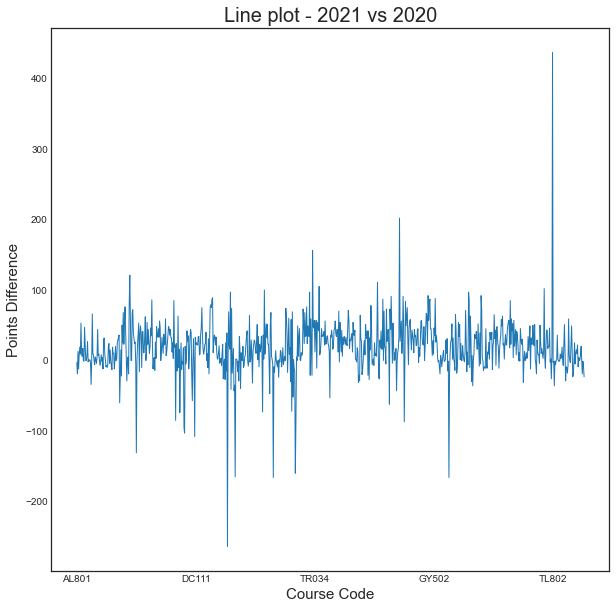

In [56]:
# Setting the size and style of the plot
plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"] = (10,10)
# Plotting the dataframe created when the values from 2020 were subtracted from 2021
Points_Diff.plot(linewidth=1)
# Formatting for improved appearance
plt.title ('Line plot - 2021 vs 2020', size=20)
plt.xlabel('Course Code', size=15)
plt.ylabel('Points Difference', size = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

<br>  

A simple plot of the column created when the values from 2020 were subtracted from 2021 indicates the fluctuations that are seen between the two years. With such a large number of data points present, it is impossbile to see all course codes individually. However, the above plot gives a visual indication of the large variations seen from one year to another in the CAO points. A change (increase or decrease) of approximately 100 points seems to occur for a lot of courses. 

In [57]:
# Setting the columns as individual dataframes
R1_Points_2021 = allcourses['R1 Points_2021']
R1_Points_2020 = allcourses['R1 Points_2020']

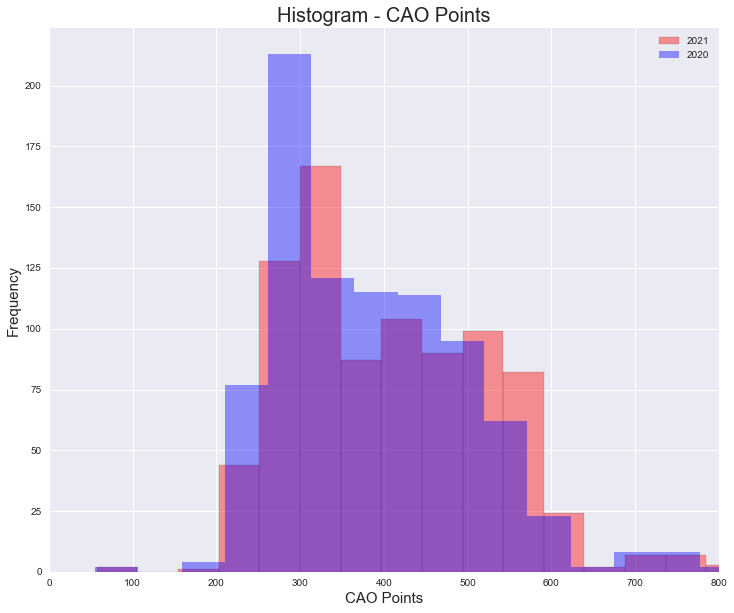

In [58]:
# Plotting
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12,10)
plt.hist(R1_Points_2021, bins=20, alpha=0.4,
         edgecolor = 'black', color = 'red', label = '2021')
plt.hist(R1_Points_2020, bins=20, alpha=0.4, color = 'blue', label = '2020')
plt.xlabel('CAO Points', size=15)
plt.ylabel('Frequency', size = 15)
plt.xlim([0, 800])
plt.title ('Histogram - CAO Points', size=20)
plt.legend()
plt.show()

Overlaying histograms of the two years points in total also gives an indications of the points variation between years. In the year 2021 the course total that was most likely is approximately 320 points (Around 165 courses were offered in this range). This varied in 2020 where the most common course point value is below 300 (~ 290), with over 200 courses being near this value. This is a simple graphical illustration of the difference between the years.  
Another option for demonstrating the change in points of courses is to plot a kernel density estimator for each year. A kernel density estimate plot can estimate the probability density function of a random variable. This should yield an easily understood plot for comparing the two year CAO points.

(0.0, 800.0)

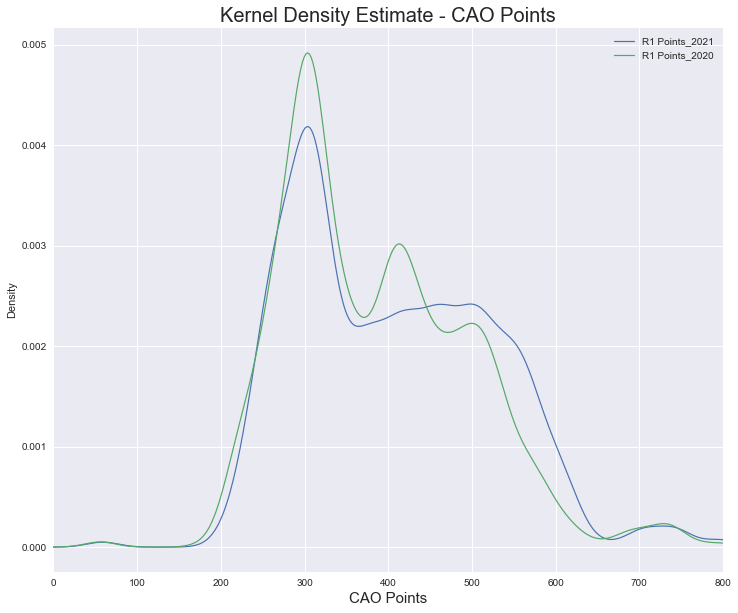

In [59]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12,10)
allcourses.plot.kde(bw_method=0.15, linewidth = 1.2)
plt.xlabel('CAO Points', size=15)
plt.title ('Kernel Density Estimate - CAO Points', size=20)
plt.xlim([0, 800])

<br>  
The kernel density estimate plot of the two years also gives a good visualisation of the two years' points. As seen in the previous histogram the most likely points value for all courses is the range of approximately 300. It was more apparent in the histogram that there was an increase from 2020 to 2021 in this range. However, a differerence in the range of 350 to 500 points has become more evident using the kde plot.  
In 2020 there is a maximum value of slightly higher than 400 points which is clear in the plot. For the year 2021 there was a greater spread of points in this range. This indicates that more courses increased towards the 500 points mark in 2021 when compared to 2020. The plot for 2021 does not drop down to near te baselinr again until the 650 point mark is reached, slightly after the plot for 2020 where the plot reaches the baseline just before the 650 mark.  
Both plots then increases slightly beyond the 700 point mark at the same rate, representing the few courses that are beyond this mark (likley to be medicine / dentistry / veterinary courses).  


![](https://github.com/G00398275/FODA2021/blob/main/images/results_sheet.png?raw=true)  
<br>
This data is backed up by media reports of the CAO points offered. There was a large increase noted which "sent shockwaves throught the education system". There are a myriad of reasons suggested for the increase in points year on year (more on previous years increases will be offered below). An obvious root cause for this years increase is the introduction of a hybrid system in the leaving cert wher students were offered the choice of taking a predicitive grade from their teacher. This predicitive grade was offered to students as a result of missing a large amount of class time due to the COVID-19 pandemic, particularly in their first year of the two year leaving cert cycle.
Another suspected reason for the increase seen in CAO points is the aspirations of students and their parents in modern society. Anecdotal evidence suggests that students are aiming for higher points than previous generations. Grinds are undertaken by a large cohort of students for the majority of subjects, whereas years ago grinds was more a niche option, which was the preserve of students of wealthy families. There is also an element of snobbery attached to certain educational routes (plc courses, apprenticeships, institutes of technology etc.) where only the most prestigious of universities are sought after and students / parents will do whatever it takes to reach these goals.  This puts enormous strain on teenagers to achieve better grades in school, thus driving up the CAO points for the majority of courses. [6][7]

## 2020 to 2019 Level 8 Comparison
***
<br>

As we have EOS (End of Season) values from the 2020 dataframe and 2019 dataframe the best approach in terms of a comparative study, is to compare these two years using these EOS (End Of Season) values. There are no EOS values at the time of writing for the 2021 data available on the CAO website.

In [60]:
pd.set_option('display.max_rows', 10)
# Creating new dataframe with  just Course Code and Course from 2020
courses2020 = df2020[['Course Code', 'Course']]
courses2020

,Course Code,Course
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1455,WD200,Arts (options)
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [61]:
# Also create new dataframe with  just Course Code and Course from 2019
# Only Level 8 present in original document
courses2019 = df2019[['Course Code', 'Course']]
courses2019

,Course Code,Course
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
925,WD200,Arts (options)
926,WD210,Software Systems Development
927,WD211,Creative Computing
928,WD212,Recreation and Sport Management


In [62]:
# Concatenate the 2020 and 2019 dataframes
# Ignoring the index creates a new index for this dataframe
eos_courses = pd.concat([courses2020, courses2019], ignore_index=True)
eos_courses

,Course Code,Course
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1952,WD200,Arts (options)
1953,WD210,Software Systems Development
1954,WD211,Creative Computing
1955,WD212,Recreation and Sport Management


In [63]:
# Sorting the values by the course code instead
eos_courses.sort_values('Course Code')

,Course Code,Course
0,AC120,International Business
1195,AC120,International Business
1,AC137,Liberal Arts
1196,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
...,...,...
1954,WD211,Creative Computing
1025,WD212,Recreation and Sport Management
1955,WD212,Recreation and Sport Management
1026,WD230,Mechanical and Manufacturing Engineering


In [64]:
# Spot check of duplicated rows, same title verified
eos_courses.loc[1025]['Course']

'Recreation and Sport Management'

In [65]:
eos_courses.loc[1955]['Course']

'Recreation and Sport Management'

In [66]:
# Duplication is expected, i.e. the same course run over different years
# Need to remove duplicates, or deduplicate the dataframe
eos_courses[eos_courses.duplicated()]

,Course Code,Course
1027,AL801,Software Design with Virtual Reality and Gaming
1029,AL803,Software Design with Mobile Apps and Connected...
1031,AL810,Quantity Surveying
1032,AL820,Mechanical and Polymer Engineering
1033,AL830,General Nursing
...,...,...
1952,WD200,Arts (options)
1953,WD210,Software Systems Development
1954,WD211,Creative Computing
1955,WD212,Recreation and Sport Management


In [67]:
# Set display rows to max to see all rows, reset to 10
pd.set_option('display.max_rows', 10)
# drop.duplicates removes the duplicated courses
eos_courses.drop_duplicates()

,Course Code,Course
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1896,TL802,"TV, Radio and New Media"
1897,TL803,Music Technology
1900,TL812,Computing with Digital Media
1904,TL842,Construction Management


In [68]:
eos_courses = eos_courses[eos_courses.duplicated(subset=['Course Code'])]

In [69]:
eos_courses.drop_duplicates(
    subset=['Course Code'], inplace=True, ignore_index=True)
eos_courses

<ipython-input-69-6f3ca9bc40fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eos_courses.drop_duplicates(


,Course Code,Course
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
786,WD200,Arts (options)
787,WD210,Software Systems Development
788,WD211,Creative Computing
789,WD212,Recreation and Sport Management


In [70]:
# The course code is now required to be the index of the dataframe
# Performed on original 2020 frame first for confirmation
df2020.set_index('Course Code', inplace=True)
df2020

,Course,R1 Points_2020,EOS_2020,Mid_2020,Level
Course Code,,,,,
AC120,International Business,209,209,280,8
AC137,Liberal Arts,252,252,270,8
AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,#+matric,#+matric,8
AD102,Graphic Design and Moving Image Design (portfo...,#+matric,#+matric,#+matric,8
AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,#+matric,#+matric,8
...,...,...,...,...,...
WD200,Arts (options),AQA,AQA,336,8
WD210,Software Systems Development,279,279,337,8
WD211,Creative Computing,271,271,318,8


In [71]:
eos_courses.set_index('Course Code', inplace=True)
eos_courses

,Course
Course Code,
AL801,Software Design with Virtual Reality and Gaming
AL802,Software Design with Cloud Computing
AL803,Software Design with Mobile Apps and Connected...
AL805,Network Management and Cloud Infrastructure
AL810,Quantity Surveying
...,...
WD200,Arts (options)
WD210,Software Systems Development
WD211,Creative Computing


In [72]:
# Join the points from 2020
eos_courses = eos_courses.join(df2020[['EOS_2020']])
eos_courses

,Course,EOS_2020
Course Code,,
AL801,Software Design with Virtual Reality and Gaming,303
AL802,Software Design with Cloud Computing,332
AL803,Software Design with Mobile Apps and Connected...,337
AL805,Network Management and Cloud Infrastructure,333
AL810,Quantity Surveying,326
...,...,...
WD200,Arts (options),AQA
WD210,Software Systems Development,279
WD211,Creative Computing,271


In [73]:
# Create dataframe with course code and points from 2019
df2019_EOS = df2019[['Course Code', 'EOS_2019']]
df2019_EOS

,Course Code,EOS_2019
0,AL801,304
1,AL802,301
2,AL803,309
3,AL805,329
4,AL810,307
...,...,...
925,WD200,221
926,WD210,271
927,WD211,275
928,WD212,274


In [74]:
# Setting the index as the course code as done previously
df2019_EOS.set_index('Course Code', inplace=True)
df2019_EOS

,EOS_2019
Course Code,
AL801,304
AL802,301
AL803,309
AL805,329
AL810,307
...,...
WD200,221
WD210,271
WD211,275


In [75]:
# Joining the 2019 EOS points to the 2020 EOS points
eos_courses = eos_courses.join(df2019_EOS)
eos_courses

,Course,EOS_2020,EOS_2019
Course Code,,,
AL801,Software Design with Virtual Reality and Gaming,303,304
AL802,Software Design with Cloud Computing,332,301
AL803,Software Design with Mobile Apps and Connected...,337,309
AL805,Network Management and Cloud Infrastructure,333,329
AL810,Quantity Surveying,326,307
...,...,...,...
WD200,Arts (options),AQA,221
WD210,Software Systems Development,279,271
WD211,Creative Computing,271,275


In [76]:
# Dropping courses (16 in total) with NaN values, same as 2021/2020 comparison
# Can't do numerical assessment on NaN values
eos_courses.dropna(inplace=True)
eos_courses

,Course,EOS_2020,EOS_2019
Course Code,,,
AL801,Software Design with Virtual Reality and Gaming,303,304
AL802,Software Design with Cloud Computing,332,301
AL803,Software Design with Mobile Apps and Connected...,337,309
AL805,Network Management and Cloud Infrastructure,333,329
AL810,Quantity Surveying,326,307
...,...,...,...
WD200,Arts (options),AQA,221
WD210,Software Systems Development,279,271
WD211,Creative Computing,271,275


In [77]:
# Removing all courses with All Qualified Applicants (AQA) (2 in total)
# Also cannot perform numerical analysis on AQA
eos_courses = eos_courses[~eos_courses['EOS_2020'].isin(['AQA'])]
eos_courses = eos_courses[~eos_courses['EOS_2019'].isin(['AQA'])]
eos_courses

,Course,EOS_2020,EOS_2019
Course Code,,,
AL801,Software Design with Virtual Reality and Gaming,303,304
AL802,Software Design with Cloud Computing,332,301
AL803,Software Design with Mobile Apps and Connected...,337,309
AL805,Network Management and Cloud Infrastructure,333,329
AL810,Quantity Surveying,326,307
...,...,...,...
WD195,Architectural and Building Information Modelli...,279,266
WD210,Software Systems Development,279,271
WD211,Creative Computing,271,275


In [78]:
# Removing all courses with '#+matric' (13 courses in total)
# Also cannot perform numerical assessment on these
eos_courses = eos_courses[~eos_courses['EOS_2020'].isin(['#+matric'])]
eos_courses = eos_courses[~eos_courses['EOS_2019'].isin(['#+matric'])]
eos_courses

,Course,EOS_2020,EOS_2019
Course Code,,,
AL801,Software Design with Virtual Reality and Gaming,303,304
AL802,Software Design with Cloud Computing,332,301
AL803,Software Design with Mobile Apps and Connected...,337,309
AL805,Network Management and Cloud Infrastructure,333,329
AL810,Quantity Surveying,326,307
...,...,...,...
WD195,Architectural and Building Information Modelli...,279,266
WD210,Software Systems Development,279,271
WD211,Creative Computing,271,275


In [79]:
# Checking datatypes of dataframe
eos_courses.dtypes

Course      object
EOS_2020    object
EOS_2019    object
dtype: object

In [80]:
# Need to convert from 'object' to numerical 'int64' for plotting
eos_courses["EOS_2020"] = pd.to_numeric(eos_courses["EOS_2020"])
eos_courses["EOS_2019"] = pd.to_numeric(eos_courses["EOS_2019"])
eos_courses.dtypes

Course      object
EOS_2020     int64
EOS_2019     int64
dtype: object

In [81]:
# Getting basic statistical analysis of the two columns
eos_courses[["EOS_2020", "EOS_2019"]].describe()

,EOS_2020,EOS_2019
count,760.000000,760.000000
mean,393.057895,380.727632
std,129.467194,122.981733
min,55.000000,55.000000
25%,300.000000,298.750000
50%,376.000000,355.000000
75%,473.000000,446.000000
max,1088.000000,972.000000


In [82]:
# Creating a new column which subtracts all points in 2019 from 2020
Diff = eos_courses["EOS_2020"] - eos_courses["EOS_2019"]
Diff

Course Code
AL801    -1
AL802    31
AL803    28
AL805     4
AL810    19
         ..
WD195    13
WD210     8
WD211    -4
WD212    -4
WD230   -20
Length: 760, dtype: int64

<br>

The function ".describe()" provides a quick statistical summary of a pandas dataframe. A quick assessment of the above also indicates that CAO points in general increased from 2019 to 2020. The overall mean of all points offered increased from 380 to 393. The interquartile ranges have also increased. The standard deviation has increased in 2020 compared to 2019, this indicates that there is a greater spread of points in the year 2020.  
Visual plots will now be performed to offer a clearer picture of the change in points from 2019 to 2020.

(array([-300., -200., -100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

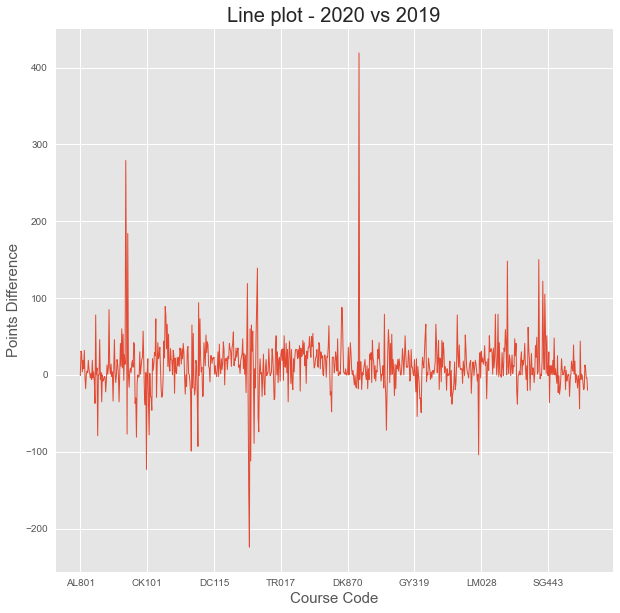

In [83]:
# Setting the size and style of the plot
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,10)
# Plotting the dataframe created when the values from 2019 were subtracted from 2020
Diff.plot(linewidth=1)
# Formatting for improved appearance
plt.title ('Line plot - 2020 vs 2019', size=20)
plt.xlabel('Course Code', size=15)
plt.ylabel('Points Difference', size = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

Again, large fluctuations are seen when comparing year to year. There are a lot of courses that have increased and decreased, in some cases in the range 50 to 100 points, with one or two extreme cases of 200 and 400 points. Again with so many courses it is impossible to see them individually with this type of plot. Histograms and KDE plots would also be very informative.

In [84]:
# Setting the columns as individual dataframes
EOS_Points_2020 = eos_courses['EOS_2020']
EOS_Points_2019 = eos_courses['EOS_2019']

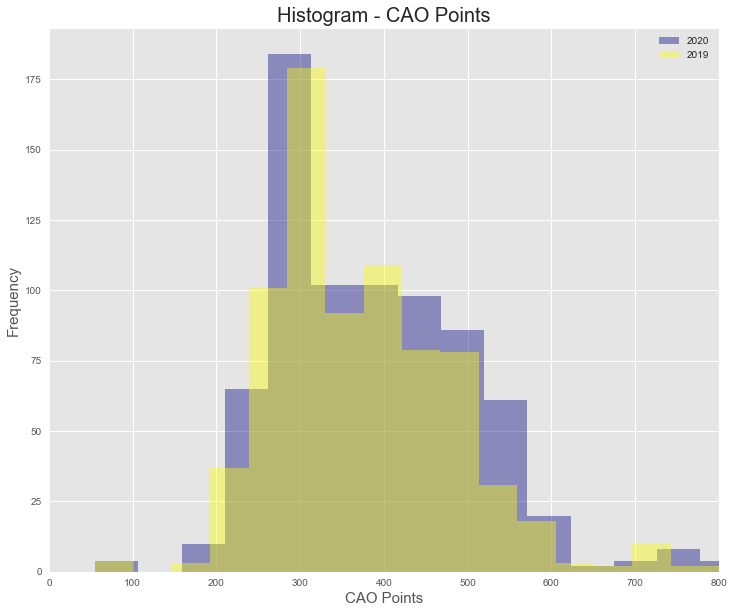

In [85]:
# Plotting
plt.style.use('seaborn-bright')
plt.rcParams["figure.figsize"] = (12,10)
plt.hist(EOS_Points_2020, bins=20, alpha=0.4, color = 'navy', label = '2020')
plt.hist(EOS_Points_2019, bins=20, alpha=0.4, color = 'yellow', label = '2019')
plt.xlabel('CAO Points', size=15)
plt.ylabel('Frequency', size = 15)
plt.xlim([0, 800])
plt.title ('Histogram - CAO Points', size=20)
plt.legend()
plt.show()

The difference in CAO points is more evident when comparing two histograms from each year. The required points are similar up to the 400 point mark. However, when courses between 400 and 600 points are on offer an increase is clearly seen, particularly in the range 500-550 points. This is also evidence of the difficulties modern day students face when attempting to predict what the required points will be for a certain course. If for example a student was hoping to take a course that was approximately 500 points in 2019, and then found that there was an increase up to say 550 points, this would put that student in very difficult position. Trying to increase your points achieved from 500 to 550 points is quite difficult, in comparison to increasing your points from, say, 300 to 350 points. 

(0.0, 800.0)

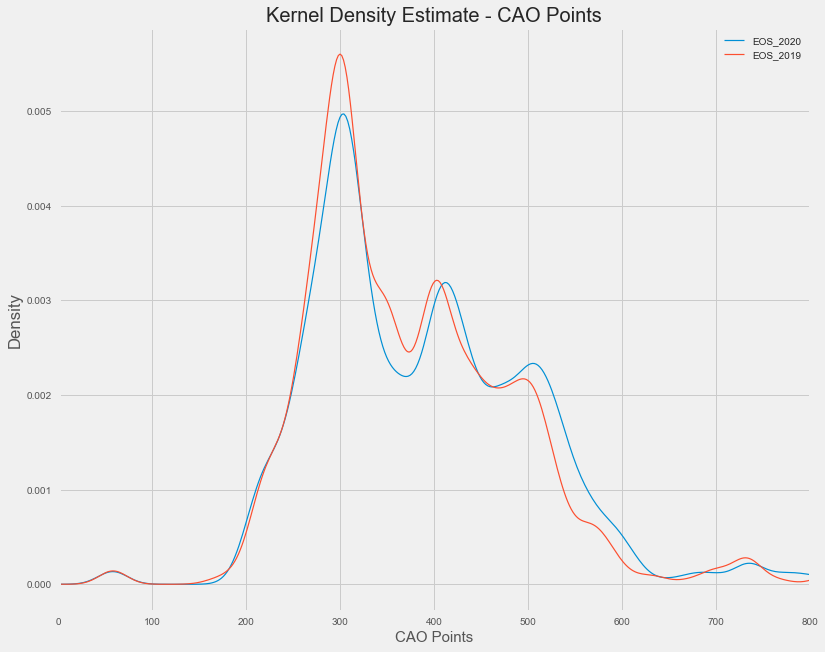

In [86]:
# Plotting KDE
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (12,10)
eos_courses.plot.kde(bw_method=0.12, linewidth = 1.2)
plt.xlabel('CAO Points', size=15)
plt.title ('Kernel Density Estimate - CAO Points', size=20)
plt.xlim([0, 800])

<br>

The KDE plot is slightly contradictory to the histogram. The changes in points are not as evident using the kde plot. Both years seem to follow the same trend across the points ranges.  
What is noticeable is that the increase from 2020 to 2021 is greater than any increase from 2019 to 2020.
A further analysis will be performed on number of previous years to determine the trend over a number of years, where the EOS value is readily available on the CAO website.

## 2016 - 2018 Level 8 Points
***
http://www2.cao.ie/points/lvl8_18.pdf 
<br>
http://www2.cao.ie/points/lvl8_17.pdf 
<br>
http://www2.cao.ie/points/lvl8_16.pdf   
<br>

The steps taken to convert the original pdf files, for 2016-2018, to a pandas dataframe
are similar to the 2019 example previously.  
The pdf files were converted to word files, unnecessary rows were deleted and all special characters (#,* etc.) were removed from the points columns.
All AQA values were also removed from the points columns for the same reason as the previous example.

<br>


In [87]:
# Loading 2018 csv file
df2018 = pd.read_csv('data/cao2018_20211124_210200_edited.csv', sep = ',',
                    usecols = [0,1,2])
df2018

,Course Code,Course,EOS_2018
0,AL801,Software Design (Game Development or Cloud Com...,295
1,AL810,Quantity Surveying,300
2,AL820,Mechanical and Polymer Engineering,299
3,AL830,General Nursing,418
4,AL832,Psychiatric Nursing,377
...,...,...,...
898,WD197,The Internet of Things,260
899,WD200,Arts,220
900,WD210,Software Systems Development,289
901,WD211,Creative Computing,265


In [88]:
# Checking data types
df2018.dtypes

Course Code    object
Course         object
EOS_2018       object
dtype: object

In [89]:
# Creating file path for 2018 data in csv format (Note file extension)
filepath2018 = 'data/cao2018_' + nowstr + '.csv'

In [90]:
# Saving dataframe
df2018.to_csv(filepath2018)

In [91]:
# Loading 2017 points
df2017 = pd.read_csv('data/cao2017_20211125_201600_edited.csv', sep = ',',
                    usecols = [0,1,2])
df2017

,Course Code,Course,EOS_2017
0,AL801,Software Design (Game Development or Cloud Com...,290
1,AL810,Quantity Surveying,311
2,AL820,Mechanical and Polymer Engineering,300
3,AL830,General Nursing,398
4,AL832,Psychiatric Nursing,378
...,...,...,...
860,WD193,Marketing and Digital Media,297
861,WD194,Culinary Arts,279
862,WD195,Architectural & Building Information Modelling...,273
863,WD197,The Internet of Things,262


In [92]:
# Checking datatypes
df2017.dtypes

Course Code    object
Course         object
EOS_2017       object
dtype: object

In [93]:
# Creating file path for 2018 data in csv format (Note file extension)
filepath2017 = 'data/cao2017_' + nowstr + '.csv'

In [94]:
# Saving dataframe
df2017.to_csv(filepath2017)

In [95]:
# Loading 2016 points
df2016 = pd.read_csv('data/cao2016_20211125_204141.csv', sep = ',',
                    usecols = [0,1,2])
df2016

,Course Code,Course,EOS_2016
0,AL801,Software Design (Game Development or Cloud Com...,300
1,AL810,Quantity Surveying,315
2,AL820,Mechanical and Polymer Engineering,295
3,AL830,General Nursing,425
4,AL831,Mature Applicants General Nursing,181
...,...,...,...
928,WD197,The Internet of Things,275
929,WD200,Arts,275
930,WD816,Mature Applicants General Nursing,188
931,WD817,Mature Applicants Psychiatric Nursing,176


In [96]:
# Checking datatypes
df2016.dtypes

Course Code    object
Course         object
EOS_2016       object
dtype: object

In [97]:
# Creating file path for 2016 data in csv format (Note file extension)
filepath2016 = 'data/cao2016_' + nowstr + '.csv'

In [98]:
# Saving dataframe
df2016.to_csv(filepath2016)

In [99]:
# Calling original 2020 to 2019 comparison dataframe
eos_courses

,Course,EOS_2020,EOS_2019
Course Code,,,
AL801,Software Design with Virtual Reality and Gaming,303,304
AL802,Software Design with Cloud Computing,332,301
AL803,Software Design with Mobile Apps and Connected...,337,309
AL805,Network Management and Cloud Infrastructure,333,329
AL810,Quantity Surveying,326,307
...,...,...,...
WD195,Architectural and Building Information Modelli...,279,266
WD210,Software Systems Development,279,271
WD211,Creative Computing,271,275


Need to join points from 2018 to 2016 for comaprative analysis

In [100]:
# Also create new dataframes with  just Course Code and Course from 2018-2016
# Only Level 8 present in original document
courses2018 = df2018[['Course Code', 'Course']]
courses2017 = df2017[['Course Code', 'Course']]
courses2016 = df2016[['Course Code', 'Course']]

In [101]:
courses2018

,Course Code,Course
0,AL801,Software Design (Game Development or Cloud Com...
1,AL810,Quantity Surveying
2,AL820,Mechanical and Polymer Engineering
3,AL830,General Nursing
4,AL832,Psychiatric Nursing
...,...,...
898,WD197,The Internet of Things
899,WD200,Arts
900,WD210,Software Systems Development
901,WD211,Creative Computing


In [102]:
courses2017

,Course Code,Course
0,AL801,Software Design (Game Development or Cloud Com...
1,AL810,Quantity Surveying
2,AL820,Mechanical and Polymer Engineering
3,AL830,General Nursing
4,AL832,Psychiatric Nursing
...,...,...
860,WD193,Marketing and Digital Media
861,WD194,Culinary Arts
862,WD195,Architectural & Building Information Modelling...
863,WD197,The Internet of Things


In [103]:
courses2016

,Course Code,Course
0,AL801,Software Design (Game Development or Cloud Com...
1,AL810,Quantity Surveying
2,AL820,Mechanical and Polymer Engineering
3,AL830,General Nursing
4,AL831,Mature Applicants General Nursing
...,...,...
928,WD197,The Internet of Things
929,WD200,Arts
930,WD816,Mature Applicants General Nursing
931,WD817,Mature Applicants Psychiatric Nursing


In [104]:
# Concatenate the 2020 - 2016 dataframes
# Ignoring the index creates a new index for this dataframe
eos_courses_all = pd.concat(
    [courses2020, courses2019, courses2018, courses2017, courses2016],
    ignore_index=True)
eos_courses_all

,Course Code,Course
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
4653,WD197,The Internet of Things
4654,WD200,Arts
4655,WD816,Mature Applicants General Nursing
4656,WD817,Mature Applicants Psychiatric Nursing


In [105]:
# Sorting the values by the course code instead
eos_courses_all.sort_values('Course Code')

,Course Code,Course
0,AC120,International Business
2112,AC120,International Business
3885,AC120,International Business
1195,AC120,International Business
3013,AC120,International Business
...,...,...
1956,WD230,Mechanical and Manufacturing Engineering
1026,WD230,Mechanical and Manufacturing Engineering
4655,WD816,Mature Applicants General Nursing
4656,WD817,Mature Applicants Psychiatric Nursing


In [106]:
# Duplication is expected, i.e. the same course run over different years
# Need to remove duplicates, or deduplicate the dataframe
eos_courses_all[eos_courses_all.duplicated()]

,Course Code,Course
1027,AL801,Software Design with Virtual Reality and Gaming
1029,AL803,Software Design with Mobile Apps and Connected...
1031,AL810,Quantity Surveying
1032,AL820,Mechanical and Polymer Engineering
1033,AL830,General Nursing
...,...,...
4650,WD193,Marketing and Digital Media
4651,WD194,Culinary Arts
4652,WD195,Architectural & Building Information Modelling...
4653,WD197,The Internet of Things


In [107]:
# drop.duplicates removes the duplicated courses
eos_courses_all.drop_duplicates()

,Course Code,Course
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
4615,TL892,Mature Applicants General Nursing
4616,TL893,Mature Applicants Mental Health Nursing
4655,WD816,Mature Applicants General Nursing
4656,WD817,Mature Applicants Psychiatric Nursing


In [108]:
# Identifying duplicates
eos_courses_all = eos_courses_all[
    eos_courses_all.duplicated(subset=['Course Code'])]

In [109]:
# Dropping duplicates
eos_courses_all.drop_duplicates(
    subset=['Course Code'], inplace=True, ignore_index=True)
eos_courses_all

<ipython-input-109-1b935df9d41d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eos_courses_all.drop_duplicates(


,Course Code,Course
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
983,WD124,Health Promotion
984,WD125,Exercise and Health Studies
985,WD160,Finance and Investment
986,WD171,Sustainable Energy Engineering


In [110]:
# Set course code as index
eos_courses_all.set_index('Course Code', inplace=True)
eos_courses_all

,Course
Course Code,
AL801,Software Design with Virtual Reality and Gaming
AL802,Software Design with Cloud Computing
AL803,Software Design with Mobile Apps and Connected...
AL805,Network Management and Cloud Infrastructure
AL810,Quantity Surveying
...,...
WD124,Health Promotion
WD125,Exercise and Health Studies
WD160,Finance and Investment


In [111]:
# Join 2020 points
eos_courses_all = eos_courses_all.join(df2020[['EOS_2020']])
eos_courses_all

,Course,EOS_2020
Course Code,,
AL801,Software Design with Virtual Reality and Gaming,303
AL802,Software Design with Cloud Computing,332
AL803,Software Design with Mobile Apps and Connected...,337
AL805,Network Management and Cloud Infrastructure,333
AL810,Quantity Surveying,326
...,...,...
WD124,Health Promotion,NaN
WD125,Exercise and Health Studies,NaN
WD160,Finance and Investment,NaN


In [112]:
# Calling 2019 course codes and points
df2019_EOS = df2019[['Course Code', 'EOS_2019']]
df2019_EOS

,Course Code,EOS_2019
0,AL801,304
1,AL802,301
2,AL803,309
3,AL805,329
4,AL810,307
...,...,...
925,WD200,221
926,WD210,271
927,WD211,275
928,WD212,274


In [113]:
# Setting the index as the course code as done previously
df2019_EOS.set_index('Course Code', inplace=True)
df2019_EOS

,EOS_2019
Course Code,
AL801,304
AL802,301
AL803,309
AL805,329
AL810,307
...,...
WD200,221
WD210,271
WD211,275


In [114]:
# Joining the 2019 EOS points to the 2020 EOS points
eos_courses_all = eos_courses_all.join(df2019_EOS)
eos_courses_all

,Course,EOS_2020,EOS_2019
Course Code,,,
AL801,Software Design with Virtual Reality and Gaming,303,304
AL802,Software Design with Cloud Computing,332,301
AL803,Software Design with Mobile Apps and Connected...,337,309
AL805,Network Management and Cloud Infrastructure,333,329
AL810,Quantity Surveying,326,307
...,...,...,...
WD124,Health Promotion,NaN,NaN
WD125,Exercise and Health Studies,NaN,NaN
WD160,Finance and Investment,NaN,NaN


In [115]:
# Calling 2018 course codes and points
df2018_EOS = df2018[['Course Code', 'EOS_2018']]
df2018_EOS

,Course Code,EOS_2018
0,AL801,295
1,AL810,300
2,AL820,299
3,AL830,418
4,AL832,377
...,...,...
898,WD197,260
899,WD200,220
900,WD210,289
901,WD211,265


In [116]:
# Setting the index as the course code as done previously
df2018_EOS.set_index('Course Code', inplace=True)
df2018_EOS

,EOS_2018
Course Code,
AL801,295
AL810,300
AL820,299
AL830,418
AL832,377
...,...
WD197,260
WD200,220
WD210,289


In [117]:
# Joining the 2018 EOS points
eos_courses_all = eos_courses_all.join(df2018_EOS)
eos_courses_all

,Course,EOS_2020,EOS_2019,EOS_2018
Course Code,,,,
AL801,Software Design with Virtual Reality and Gaming,303,304,295
AL802,Software Design with Cloud Computing,332,301,NaN
AL803,Software Design with Mobile Apps and Connected...,337,309,NaN
AL805,Network Management and Cloud Infrastructure,333,329,NaN
AL810,Quantity Surveying,326,307,300
...,...,...,...,...
WD124,Health Promotion,NaN,NaN,NaN
WD125,Exercise and Health Studies,NaN,NaN,NaN
WD160,Finance and Investment,NaN,NaN,NaN


In [118]:
# Calling 2017 course codes and points
df2017_EOS = df2017[['Course Code', 'EOS_2017']]
df2017_EOS

,Course Code,EOS_2017
0,AL801,290
1,AL810,311
2,AL820,300
3,AL830,398
4,AL832,378
...,...,...
860,WD193,297
861,WD194,279
862,WD195,273
863,WD197,262


In [119]:
# Setting the index as the course code as done previously
df2017_EOS.set_index('Course Code', inplace=True)
df2017_EOS

,EOS_2017
Course Code,
AL801,290
AL810,311
AL820,300
AL830,398
AL832,378
...,...
WD193,297
WD194,279
WD195,273


In [120]:
# Joining the 2017 EOS points
eos_courses_all = eos_courses_all.join(df2017_EOS)
eos_courses_all

,Course,EOS_2020,EOS_2019,EOS_2018,EOS_2017
Course Code,,,,,
AL801,Software Design with Virtual Reality and Gaming,303,304,295,290
AL802,Software Design with Cloud Computing,332,301,NaN,NaN
AL803,Software Design with Mobile Apps and Connected...,337,309,NaN,NaN
AL805,Network Management and Cloud Infrastructure,333,329,NaN,NaN
AL810,Quantity Surveying,326,307,300,311
...,...,...,...,...,...
WD124,Health Promotion,NaN,NaN,NaN,296
WD125,Exercise and Health Studies,NaN,NaN,NaN,273
WD160,Finance and Investment,NaN,NaN,NaN,310


In [121]:
# Calling 2016 course codes and points
df2016_EOS = df2016[['Course Code', 'EOS_2016']]
df2016_EOS

,Course Code,EOS_2016
0,AL801,300
1,AL810,315
2,AL820,295
3,AL830,425
4,AL831,181
...,...,...
928,WD197,275
929,WD200,275
930,WD816,188
931,WD817,176


In [122]:
# Setting the index as the course code as done previously
df2016_EOS.set_index('Course Code', inplace=True)
df2016_EOS

,EOS_2016
Course Code,
AL801,300
AL810,315
AL820,295
AL830,425
AL831,181
...,...
WD197,275
WD200,275
WD816,188


In [123]:
# Joining the 2016 points
eos_courses_all = eos_courses_all.join(df2016_EOS)
eos_courses_all

,Course,EOS_2020,EOS_2019,EOS_2018,EOS_2017,EOS_2016
Course Code,,,,,,
AL801,Software Design with Virtual Reality and Gaming,303,304,295,290,300
AL802,Software Design with Cloud Computing,332,301,NaN,NaN,NaN
AL803,Software Design with Mobile Apps and Connected...,337,309,NaN,NaN,NaN
AL805,Network Management and Cloud Infrastructure,333,329,NaN,NaN,NaN
AL810,Quantity Surveying,326,307,300,311,315
...,...,...,...,...,...,...
WD124,Health Promotion,NaN,NaN,NaN,296,290
WD125,Exercise and Health Studies,NaN,NaN,NaN,273,280
WD160,Finance and Investment,NaN,NaN,NaN,310,300


In [124]:
# Dropping courses with NaN values
# Can't do numerical assessment on NaN values
eos_courses_all.dropna(inplace=True)
eos_courses_all

,Course,EOS_2020,EOS_2019,EOS_2018,EOS_2017,EOS_2016
Course Code,,,,,,
AL801,Software Design with Virtual Reality and Gaming,303,304,295,290,300
AL810,Quantity Surveying,326,307,300,311,315
AL820,Mechanical and Polymer Engineering,308,300,299,300,295
AL830,General Nursing,442,410,418,398,425
AL832,Psychiatric Nursing,384,387,377,378,375
...,...,...,...,...,...,...
WD192,Social Care Practice,270,279,280,287,300
WD193,Marketing and Digital Media,271,290,295,297,300
WD194,Culinary Arts,217,235,282,279,305


In [125]:
# Removing all courses with All Qualified Applicants (AQA)
# Also cannot perform numerical analysis on AQA
eos_courses_all = eos_courses_all[
    ~eos_courses_all['EOS_2020'].isin(['AQA'])]
eos_courses_all = eos_courses_all[
    ~eos_courses_all['EOS_2019'].isin(['AQA'])]
eos_courses_all = eos_courses_all[
    ~eos_courses_all['EOS_2018'].isin(['AQA'])]
eos_courses_all = eos_courses_all[
    ~eos_courses_all['EOS_2017'].isin(['AQA'])]
eos_courses_all = eos_courses_all[
    ~eos_courses_all['EOS_2016'].isin(['AQA'])]
eos_courses_all

,Course,EOS_2020,EOS_2019,EOS_2018,EOS_2017,EOS_2016
Course Code,,,,,,
AL801,Software Design with Virtual Reality and Gaming,303,304,295,290,300
AL810,Quantity Surveying,326,307,300,311,315
AL820,Mechanical and Polymer Engineering,308,300,299,300,295
AL830,General Nursing,442,410,418,398,425
AL832,Psychiatric Nursing,384,387,377,378,375
...,...,...,...,...,...,...
WD191,Agricultural Science,377,378,403,389,400
WD192,Social Care Practice,270,279,280,287,300
WD193,Marketing and Digital Media,271,290,295,297,300


In [126]:
# Removing all courses with '#+matric'
# Also cannot perform numerical assessment on these
eos_courses_all = eos_courses_all[
    ~eos_courses_all['EOS_2020'].isin(['#+matric'])]
eos_courses_all = eos_courses_all[
    ~eos_courses_all['EOS_2019'].isin(['#+matric'])]
eos_courses_all = eos_courses_all[
    ~eos_courses_all['EOS_2018'].isin(['#+matric'])]
eos_courses_all = eos_courses_all[
    ~eos_courses_all['EOS_2017'].isin(['#+matric'])]
eos_courses_all = eos_courses_all[
    ~eos_courses_all['EOS_2016'].isin(['#+matric'])]
eos_courses_all

,Course,EOS_2020,EOS_2019,EOS_2018,EOS_2017,EOS_2016
Course Code,,,,,,
AL801,Software Design with Virtual Reality and Gaming,303,304,295,290,300
AL810,Quantity Surveying,326,307,300,311,315
AL820,Mechanical and Polymer Engineering,308,300,299,300,295
AL830,General Nursing,442,410,418,398,425
AL832,Psychiatric Nursing,384,387,377,378,375
...,...,...,...,...,...,...
WD191,Agricultural Science,377,378,403,389,400
WD192,Social Care Practice,270,279,280,287,300
WD193,Marketing and Digital Media,271,290,295,297,300


In [127]:
# Checking datatypes of dataframe
eos_courses_all.dtypes

Course      object
EOS_2020    object
EOS_2019    object
EOS_2018    object
EOS_2017    object
EOS_2016    object
dtype: object

In [128]:
# Need to convert to integer format for plotting
eos_courses_all["EOS_2020"] = pd.to_numeric(eos_courses_all["EOS_2020"])
eos_courses_all["EOS_2019"] = pd.to_numeric(eos_courses_all["EOS_2019"])
eos_courses_all["EOS_2018"] = pd.to_numeric(eos_courses_all["EOS_2018"])
eos_courses_all["EOS_2017"] = pd.to_numeric(eos_courses_all["EOS_2017"])
eos_courses_all["EOS_2016"] = pd.to_numeric(eos_courses_all["EOS_2016"])
eos_courses_all.dtypes

Course      object
EOS_2020     int64
EOS_2019     int64
EOS_2018     int64
EOS_2017     int64
EOS_2016     int64
dtype: object

In [129]:
# Getting basic statistical analysis of the five years
eos_courses_all[["EOS_2020", "EOS_2019", "EOS_2018",
                 "EOS_2017", "EOS_2016"]].describe()

,EOS_2020,EOS_2019,EOS_2018,EOS_2017,EOS_2016
count,611.000000,611.000000,611.000000,611.000000,611.000000
mean,403.183306,389.936170,388.446809,391.263502,393.828151
std,134.623783,128.417917,123.481140,126.264389,119.325405
min,55.000000,55.000000,54.000000,54.000000,55.000000
25%,302.000000,300.000000,300.000000,300.000000,300.000000
50%,397.000000,370.000000,373.000000,378.000000,385.000000
75%,487.000000,459.500000,456.000000,465.000000,465.000000
max,1088.000000,972.000000,988.000000,1001.000000,900.000000


<br>  

***  
An interesting point to note about the above statistical analysis is the lack of an increase in CAO points over the years prior to 2020. As stated previously I have omitted the 2021 points from  this analysis as the only points available at the time of writing were the points from the first two rounds. These are not the same as the end of season (EOS) points so in order to do an accurate comparison from different years it would be inaccurate to compare points from the first two rounds to EOS points.  
Admittedly there are a number of courses omitted from each year due to the presence of AQA, or the lack of a points value in the orignal data due to the course not being offered.However, this analysis does  provide a good overall summary of the changes in points from the past few years. As is ususally the case, plotting the data will provide a better understanding of the data.

In [130]:
# Setting the columns as individual dataframes
EOS_Points_2020 = eos_courses_all['EOS_2020']
EOS_Points_2019 = eos_courses_all['EOS_2019']
EOS_Points_2018 = eos_courses_all['EOS_2018']
EOS_Points_2017 = eos_courses_all['EOS_2017']
EOS_Points_2016 = eos_courses_all['EOS_2016']

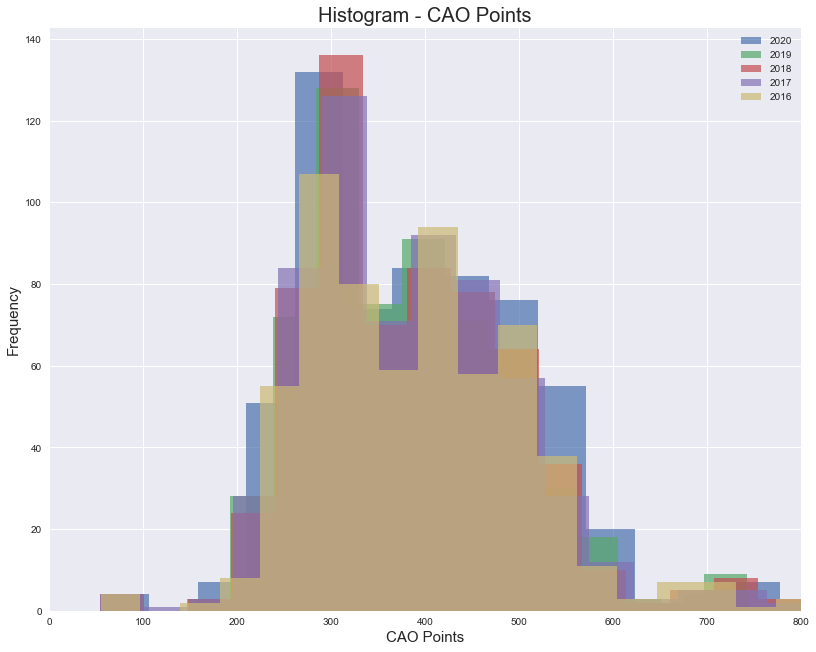

In [131]:
# Plotting
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12,10)
plt.hist(EOS_Points_2020, bins=20, alpha=0.7, label = '2020')
plt.hist(EOS_Points_2019, bins=20, alpha=0.7, label = '2019')
plt.hist(EOS_Points_2018, bins=20, alpha=0.7, label = '2018')
plt.hist(EOS_Points_2017, bins=20, alpha=0.7, label = '2017')
plt.hist(EOS_Points_2016, bins=20, alpha=0.7, label = '2016')
plt.xlabel('CAO Points', size=15)
plt.ylabel('Frequency', size = 15)
plt.xlim([0, 800])
plt.title ('Histogram - CAO Points', size=20)
plt.legend()
plt.show()

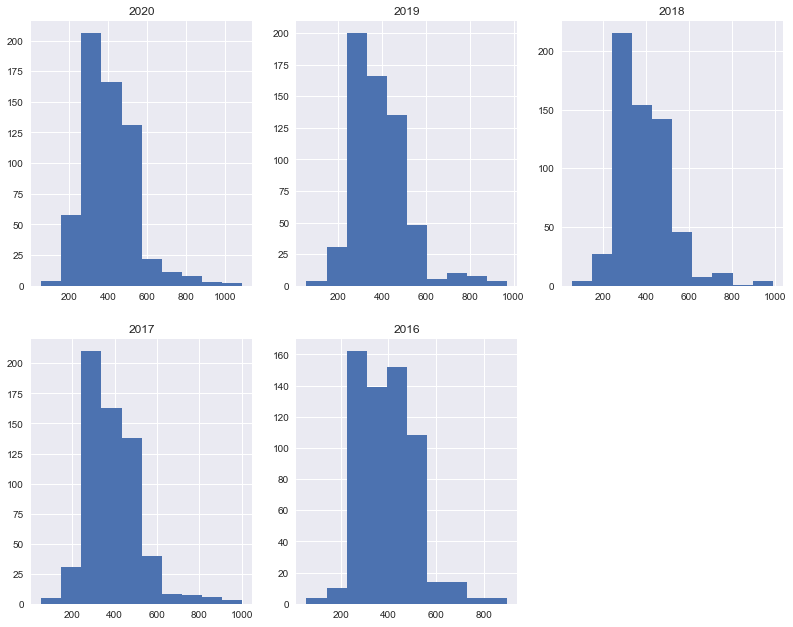

In [132]:
# Subplots for clarity
# Setting 2 rows, 3 columns and indexing the plots 1-5
plt.subplot(2, 3, 1)
plt.title('2020')
plt.hist(EOS_Points_2020)

plt.subplot(2, 3, 2)
plt.title('2019')
plt.hist(EOS_Points_2019)

plt.subplot(2, 3, 3)
plt.title('2018')
plt.hist(EOS_Points_2018)

plt.subplot(2, 3, 4)
plt.title('2017')
plt.hist(EOS_Points_2017)

plt.subplot(2, 3, 5)
plt.title('2016')
plt.hist(EOS_Points_2016)

plt.show()

As we are now overlaying five different histograms there is a certain level of confusion regarding the plot, included subplots for clarity. There is, however, a great degree of overlap between the years without much change. This does indicate that there is not a general increase of points throughout the five years but instead the points have only started to rise over the past three years. A kernel density plot of the five years data may yield a clearer picture.

(0.0, 800.0)

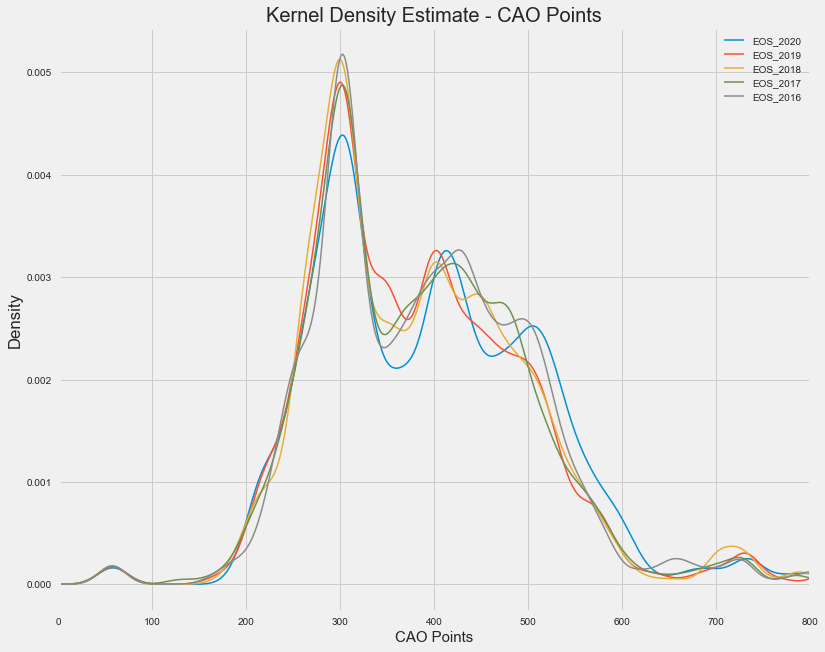

In [133]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (12,10)
eos_courses_all.plot.kde(bw_method=0.12, linewidth = 1.5)
plt.xlabel('CAO Points', size=15)
plt.title ('Kernel Density Estimate - CAO Points', size=20)
plt.xlim([0, 800])

From the KDE plot it can be seen that the biggest increase was seen in 2020, indicated by the presence of a "peak" at the 500 points mark, and the decrease of the maximum at the 300 point mark in comparison to previous years. The years 2016 to 2019 are a lot more comparable, with only slight variations observed from year to year.  
The reason for the increase in the year 2020 can be attributed to the use of predicitive grades for the first time in the history of the Leaving Cert exams. The predicitive grade system was employed due to the COVID-19 pandemic as students were forced to miss a large amount of in-class teaching throughout the school year. It was felt that a fairer option would be for teachers to provide a predicted grade in their subjects instead of a state exam. While it probably was the fairest option available at the time it does have some drawbacks.  
The main benefit of the traditional state exam was the anonymity of each student. Each student is assigned a number instead of using their name. The examiner is not aware of the student's identity when correcting a paper, thus ensuring each student gets a fair,unbiased assessment of their work. Using predicitive grades could introduce an element of bias (unconscious or otherwise) when a teacher is grading a student. Another drawback of the predicitive grade method was seen in the UK where certain more "prestigious" schools were giving out higher than average grades [8] and also, shockingly, ethnic minorities were given lower than typical grades.  
The preferred option is to blend the two approaches, where a form of continuous assessment is done throughout the Leaving Cert cycle to partially contribute to a student's overall mark, but a final exam is also done anonymously to give each student a fair chance of succeeding.

<br>

## Level 7/6 Course Comparison
***

<br>

To do a fair analysis of the CAO points system then the points offered for Level 7 and 6 courses should also be assessed. This will be done in the same manner as the previous examples. The 2021 points are only available at time of writing for Rounds 1 and 2, and not the EOS values. 2020 values have both Rounds and EOS values, previous years only offer the EOSM values. 2021 Round 1 will be compared to 2020 Round 1. 2020 to 2016 EOS values will subsequently be assessed as previous.


<br>

## 2021 Points - Level 7/6
***

<br>

http://www2.cao.ie/points/l76.php  

<br>

In [134]:
# Retrieving the 2021 CAO from this URL using the requests module
resp_7_6 = rq.get('http://www2.cao.ie/points/l76.php')

# Veryifing Python has downloaded the data from the URL, [200] means it's ok
resp_7_6

<Response [200]>

In [135]:
# Filepath to be created in data folder to save original data
filepath_2021_7_6 = 'data/cao2021_' + nowstr + '.html'

In [136]:
# Amending the original encoding
original_encoding = resp_7_6.encoding

# Changing to 'cp1252'
resp_7_6.encoding = 'cp1252'

In [137]:
# Saving the original file downloaded from server
with open(filepath_2021_7_6, 'w') as f:
    f.write(resp_7_6.text)

In [138]:
# Compiling the regular expression for the matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')
# This gives us only the lines in the original HTML code that have CAO points

In [139]:
# Creating filepath to save the new csv file
filepath_2021_7_6 = 'data/cao2021_7_6_csv_' + nowstr + '.csv'

# Adding a counter to total the number of courses processed
no_lines = 0

# Opening filepath to save new csv file
with open(filepath_2021_7_6, 'w') as f:
    # Need a header row, defining column titles
    f.write(','.join (['Course Code', 'Course', 'R1 Points_2021', 
                      'R2 Points_2021']) + '\n')
# Looping through the lines of the data 
    for line in resp_7_6.iter_lines():
        
        # Decode the line but using the 'wrong' encoding
        dline = line.decode('cp1252')
    
        # Using regular expression to match lines with courses and points only
        if re_course.fullmatch(dline):
        
            # Adding 1 for each line matched to give an overall total using the counter
            no_lines = no_lines + 1
            
            # Define the course code, first five characters using index
            course_code = dline[:5]
            
            # Define the course title, using index also, stripping blank spaces
            course_title = dline [7:57].strip()
            
            # Define the round one points column, incorporating spaces
            course_points = re.split(' +', dline[60:])
            
            # If the course has a round 2 points value, needs to be included
            if len(course_points) != 2:
                course_points = course_points[:2]
        
            # Defining the above strings as one array
            linesplit = [course_code, course_title, 
            course_points[0], course_points[1]]
        
            # Concatenate the substrings after splitting but with commas in between
            # Rejoined and using '\n' to add a new line for each course
            f.write(','.join(linesplit) + '\n')
        
# Displaying the total number of lines processed
print(f"Total number of lines is {no_lines}. ")

Total number of lines is 416. 


In [140]:
# Ensure Version 2 is read into pandas, removing special characters
# Same as previous approach, special characters removed in Notepad++
df2021_7_6 = pd.read_csv('data/cao2021_7_6_csv_20211127_091819_ver2.csv',
                     encoding='cp1252', sep=',')

In [141]:
df2021_7_6

,Course Code,Course,R1 Points_2021,R2 Points_2021
0,AL605,Music and Instrument Technology,211,NaN
1,AL630,Pharmacy Technician,308,NaN
2,AL631,Dental Nursing,311,NaN
3,AL632,Applied Science,297,NaN
4,AL650,Business,AQA,AQA
...,...,...,...,...
411,WD188,Applied Health Care,220,NaN
412,WD205,Molecular Biology with Biopharmaceutical Science,AQA,262v
413,WD206,Electronic Engineering,180,NaN
414,WD207,Mechanical Engineering,172,NaN


<br>

## 2020 Points - Level 7/6
***

<br>

The Level 6 and 7 courses from the year 2020 have already been imported above for the Level 8 comparison. In the previous instance the level 6 and 7 courses were removed leaving the level 8 courses. For this comparison the opposite will be performed, the Level 8 courses will be removed, leaving the Level 6 and 7 courses for analysis.

In [142]:
# Downloading and Parsing the spreadsheet
# Skipping initial 10 rows as no relevant data contained within
# Only loading certain columns as not all needed
df2020_l7_6 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx',
                       skiprows=10,  usecols = [1,2,3,7,9,10])
df2020_l7_6.rename(columns={'COURSE TITLE': 'Course', 'COURSE CODE2': 'Course Code',
                      'EOS Mid-point' : 'Mid_2020', 'R1 POINTS' : 'R1 Points_2020',
                      'EOS' : 'EOS_2020', 'LEVEL' : 'Level'},
              inplace=True)
# Re-labelling columns to align with other years' data
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df2020_l7_6=df2020_l7_6[['Course Code', 'Course', 'R1 Points_2020', 'EOS_2020', 'Mid_2020', 'Level']]
# Re-arranging columns to align with other years' data
# https://erikrood.com/Python_References/change_order_dataframe_columns_final.html

In [143]:
# Checking first five rows for formatting
df2020_l7_6.head()

,Course Code,Course,R1 Points_2020,EOS_2020,Mid_2020,Level
0,AC120,International Business,209,209,280,8
1,AC137,Liberal Arts,252,252,270,8
2,AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,#+matric,#+matric,8
3,AD102,Graphic Design and Moving Image Design (portfo...,#+matric,#+matric,#+matric,8
4,AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,#+matric,#+matric,8


In [144]:
df2020_l7_6.tail()

,Course Code,Course,R1 Points_2020,EOS_2020,Mid_2020,Level
1459,WD208,Manufacturing Engineering,188,188,339,7
1460,WD210,Software Systems Development,279,279,337,8
1461,WD211,Creative Computing,271,271,318,8
1462,WD212,Recreation and Sport Management,270,270,349,8
1463,WD230,Mechanical and Manufacturing Engineering,253,253,369,8


In [145]:
# Checking datatype, can remove rows of level 8 using mathematical filter <= 7
df2020.dtypes

Course            object
R1 Points_2020    object
EOS_2020          object
Mid_2020          object
Level              int64
dtype: object

In [146]:
# Need to remove all Level 7 and 6 courses.
# For the purposes of this assignment, only comparing Level 8 courses
# https://appdividend.com/2020/04/28/python-how-to-select-rows-from-pandas-dataframe/
df2020_l7_6 = df2020_l7_6.loc[df2020_l7_6['Level'] <= 7]
df2020_l7_6

,Course Code,Course,R1 Points_2020,EOS_2020,Mid_2020,Level
12,AL600,Software Design,AQA,104,279,6
13,AL601,Computer Engineering,AQA,112,192,6
14,AL602,Mechanical Engineering,AQA,260,424,6
15,AL604,Civil Engineering,AQA,AQA,244,6
16,AL605,Music and Instrument Technology,AQA,154,306,6
...,...,...,...,...,...,...
1449,WD188,Applied Health Care,201,201,349,7
1456,WD205,Molecular Biology with Biopharmaceutical Science,228,228,446,7
1457,WD206,Electronic Engineering,179,179,373,7
1458,WD207,Mechanical Engineering,198,198,365,7


In [147]:
df2020_l7_6.describe()

,Level
count,437.000000
mean,6.791762
std,0.406513
min,6.000000
25%,7.000000
50%,7.000000
75%,7.000000
max,7.000000


In [148]:
# Spot checking random row, appropriate data is present
df2020_l7_6.iloc[333]

Course Code                                               TU643
Course            Culinary Arts (Professional Cookery Practice)
R1 Points_2020                                              236
EOS_2020                                                    236
Mid_2020                                                    383
Level                                                         6
Name: 1211, dtype: object

In [149]:
# Creating file path for 2020 level 6 & 7 data in csv format (Note file extension)
filepath2020_l7_6 = 'data/cao2020_l7_6_' + nowstr + '.csv'

In [150]:
# Saving dataframe
df2020_l7_6.to_csv(filepath2020_l7_6)

<br>

## 2019 to 2016 Level 6 and 7 points
***
<br>
The steps taken to convert the original pdf files, for 2016-2019, to a pandas dataframe are similar to the 2019 level 8 example previously.
The pdf files were converted to word files, unnecessary rows were deleted and all special characters (#,* etc.) were removed from the points columns. All AQA values were also removed from the points columns for the same reason as the previous example.

In [151]:
# Loading 2019 Levels 7 and 6 csv file
df2019_l7_6 = pd.read_csv('data/cao2019_l7_6_20211130_210200.csv', sep = ',',
                    usecols = [0,1,2])
df2019_l7_6

,Course Code,Course,EOS_2019_6_7
0,AL600,Software Design,205.0
1,AL601,Computer Engineering,196.0
2,AL602,Mechanical Engineering,258.0
3,AL604,Civil Engineering,252.0
4,AL630,Pharmacy Technician,306.0
...,...,...,...
456,WD188,Applied Health Care,206.0
457,WD205,Molecular Biology with Biopharmaceutical Science,208.0
458,WD206,Electronic Engineering,191.0
459,WD207,Mechanical Engineering,179.0


In [152]:
df2019_l7_6.dtypes

Course Code      object
Course           object
EOS_2019_6_7    float64
dtype: object

In [153]:
# Creating file path for 2020 data in csv format (Note file extension)
filepath2019_l7_6 = 'data/cao2019_l7_6_' + nowstr + '.csv'

In [154]:
# Saving dataframe
df2019_l7_6.to_csv(filepath2019_l7_6)

In [155]:
# Loading 2018 Levels 7 and 6 csv file
df2018_l7_6 = pd.read_csv('data/cao2018_l7_6_20211130_213100.csv', sep = ',',
                    usecols = [0,1,2])
df2018_l7_6

,Course Code,Course,EOS_2018_7_6
0,AL601,Electronics and Computer Engineering,240.0
1,AL602,Mechanical Engineering,201.0
2,AL604,Civil Engineering,243.0
3,AL630,Pharmacy Technician,306.0
4,AL631,Dental Nursing,307.0
...,...,...,...
466,WD205,Molecular Biology with Biopharmaceutical Science,217.0
467,WD206,Electronic Engineering,175.0
468,WD207,Mechanical Engineering,182.0
469,WD208,Manufacturing Engineering,180.0


In [156]:
df2018_l7_6.dtypes

Course Code      object
Course           object
EOS_2018_7_6    float64
dtype: object

In [157]:
# Creating file path for 2020 data in csv format (Note file extension)
filepath2018_l7_6 = 'data/cao2018_l7_6_' + nowstr + '.csv'

In [158]:
# Saving dataframe
df2018_l7_6.to_csv(filepath2018_l7_6)

In [159]:
# Loading 2017 Levels 7 and 6 csv file
df2017_l7_6 = pd.read_csv('data/cao2017_l7_6_20211130_215000.csv', sep = ',',
                    usecols = [0,1,2])
df2017_l7_6

,Course Code,Course,EOS_2017_7_6
0,AL601,Electronics and Computer Engineering,228.0
1,AL602,Mechanical Engineering,212.0
2,AL604,Civil Engineering,NaN
3,AL630,Pharmacy Technician,290.0
4,AL631,Dental Nursing,273.0
...,...,...,...
452,WD176,Applied Biology,242.0
453,WD177,Science (Agricultural Applied Biology Food Pha...,357.0
454,WD182,Electrical Engineering,196.0
455,WD184,Retail Management,190.0


In [160]:
df2017_l7_6.dtypes

Course Code      object
Course           object
EOS_2017_7_6    float64
dtype: object

In [161]:
# Creating file path for 2017 data in csv format (Note file extension)
filepath2017_l7_6 = 'data/cao2017_l7_6_' + nowstr + '.csv'

In [162]:
# Saving dataframe
df2017_l7_6.to_csv(filepath2017_l7_6)

In [163]:
# Loading 2016 Levels 7 and 6 csv file
df2016_l7_6 = pd.read_csv('data/cao2016_l7_6_20211130_215700.csv', sep = ',',
                    usecols = [0,1,2])
df2016_l7_6

,Course Code,Course,EOS_2016_7_6
0,AL601,Electronics and Computer Engineering,205.0
1,AL602,Mechanical Engineering,205.0
2,AL604,Civil Engineering,280.0
3,AL630,Pharmacy Technician,270.0
4,AL631,Dental Nursing,275.0
...,...,...,...
458,WD176,Applied Biology,300.0
459,WD177,Science (Agricultural Applied Biology Food Pha...,315.0
460,WD182,Electrical Engineering,205.0
461,WD184,Retail Management,200.0


In [164]:
df2016_l7_6.dtypes

Course Code      object
Course           object
EOS_2016_7_6    float64
dtype: object

In [165]:
# Creating file path for 2017 data in csv format (Note file extension)
filepath2016_l7_6 = 'data/cao2016_l7_6_' + nowstr + '.csv'

In [166]:
# Saving dataframe
df2016_l7_6.to_csv(filepath2016_l7_6)

<br>

## Concatenate and Joint Dataframes - Round 1 Points 2021 - 2020 (Level 6/7)
***

<br>
Taking a similar approach to the Level 8 courses. The round 1 points offered in 2021 will be compared to the round 1 points in 2020. As only Rounds 1 and 2 are available for 2021 at the time of writing, this is the preferred appraoch. The end of season (EOS) points will then be compared from 2020 to 2016 inclusive.

In [167]:
# Creating new dataframe from 2021 Levels 6 and 7 with just Code and Course
courses2021_l7_6 = df2021_7_6[['Course Code', 'Course']]
courses2021_l7_6

,Course Code,Course
0,AL605,Music and Instrument Technology
1,AL630,Pharmacy Technician
2,AL631,Dental Nursing
3,AL632,Applied Science
4,AL650,Business
...,...,...
411,WD188,Applied Health Care
412,WD205,Molecular Biology with Biopharmaceutical Science
413,WD206,Electronic Engineering
414,WD207,Mechanical Engineering


In [168]:
# Creating new dataframe from 2020 Levels 6 and 7 with just Code and Course
courses2020_l7_6 = df2020_l7_6[['Course Code', 'Course']]
courses2020_l7_6

,Course Code,Course
12,AL600,Software Design
13,AL601,Computer Engineering
14,AL602,Mechanical Engineering
15,AL604,Civil Engineering
16,AL605,Music and Instrument Technology
...,...,...
1449,WD188,Applied Health Care
1456,WD205,Molecular Biology with Biopharmaceutical Science
1457,WD206,Electronic Engineering
1458,WD207,Mechanical Engineering


In [169]:
# Concatenate the two newly created dataframes from 2021 / 2020
# Ignoring the index creates a new index for this dataframe
allcourses_l7_6 = pd.concat([courses2021_l7_6, courses2020_l7_6], ignore_index=True)
allcourses_l7_6

,Course Code,Course
0,AL605,Music and Instrument Technology
1,AL630,Pharmacy Technician
2,AL631,Dental Nursing
3,AL632,Applied Science
4,AL650,Business
...,...,...
848,WD188,Applied Health Care
849,WD205,Molecular Biology with Biopharmaceutical Science
850,WD206,Electronic Engineering
851,WD207,Mechanical Engineering


In [170]:
# Sorting the values by the course code instead
allcourses_l7_6.sort_values('Course Code')

,Course Code,Course
416,AL600,Software Design
417,AL601,Computer Engineering
418,AL602,Mechanical Engineering
419,AL604,Civil Engineering
0,AL605,Music and Instrument Technology
...,...,...
850,WD206,Electronic Engineering
851,WD207,Mechanical Engineering
414,WD207,Mechanical Engineering
415,WD208,Manufacturing Engineering


In [171]:
# Spot check of duplicated rows, same title verified
allcourses_l7_6.loc[851]['Course']

'Mechanical Engineering'

In [172]:
allcourses_l7_6.loc[414]['Course']

'Mechanical Engineering'

In [173]:
# Duplication is expected, i.e. the same course run over different years
# Need to remove duplicates, or deduplicate the dataframe
allcourses_l7_6[allcourses_l7_6.duplicated()]

,Course Code,Course
420,AL605,Music and Instrument Technology
421,AL630,Pharmacy Technician
422,AL631,Dental Nursing
423,AL632,Applied Science
424,AL650,Business
...,...,...
848,WD188,Applied Health Care
849,WD205,Molecular Biology with Biopharmaceutical Science
850,WD206,Electronic Engineering
851,WD207,Mechanical Engineering


In [174]:
# drop.duplicates removes the duplicated courses
allcourses_l7_6.drop_duplicates()

,Course Code,Course
0,AL605,Music and Instrument Technology
1,AL630,Pharmacy Technician
2,AL631,Dental Nursing
3,AL632,Applied Science
4,AL650,Business
...,...,...
817,TU783,Marketing
820,TU793,Early Childhood Care and Education
821,TU794,Early Childhood Care and Education
835,WD139,Civil Engineering


In [175]:
# Locate all rows with the same course title
allcourses_l7_6[allcourses_l7_6.duplicated(subset=['Course Code'])]

,Course Code,Course
420,AL605,Music and Instrument Technology
421,AL630,Pharmacy Technician
422,AL631,Dental Nursing
423,AL632,Applied Science
424,AL650,Business
...,...,...
848,WD188,Applied Health Care
849,WD205,Molecular Biology with Biopharmaceutical Science
850,WD206,Electronic Engineering
851,WD207,Mechanical Engineering


In [176]:
# Remove duplicates
allcourses_l7_6.drop_duplicates(subset=['Course Code'], inplace=True, ignore_index=True)
allcourses_l7_6

,Course Code,Course
0,AL605,Music and Instrument Technology
1,AL630,Pharmacy Technician
2,AL631,Dental Nursing
3,AL632,Applied Science
4,AL650,Business
...,...,...
454,TU779,International Business
455,TU783,Marketing
456,TU793,Early Childhood Care and Education
457,TU794,Early Childhood Care and Education


<br>

## Joining the Dataframe to the Points - 2021 - 2020 (Levels 6/7)
***

<br>
The round 1 points from  2021 and 2020 will now be joined to the newly created dataframe above.

In [177]:
# Set index on 2021 level 6 and 7 dataframe to join
df2021_7_6.set_index('Course Code', inplace=True)
df2021_7_6

,Course,R1 Points_2021,R2 Points_2021
Course Code,,,
AL605,Music and Instrument Technology,211,NaN
AL630,Pharmacy Technician,308,NaN
AL631,Dental Nursing,311,NaN
AL632,Applied Science,297,NaN
AL650,Business,AQA,AQA
...,...,...,...
WD188,Applied Health Care,220,NaN
WD205,Molecular Biology with Biopharmaceutical Science,AQA,262v
WD206,Electronic Engineering,180,NaN


In [178]:
# Set Course Code to index on "combined" dataframe
allcourses_l7_6.set_index('Course Code', inplace=True)
allcourses_l7_6

,Course
Course Code,
AL605,Music and Instrument Technology
AL630,Pharmacy Technician
AL631,Dental Nursing
AL632,Applied Science
AL650,Business
...,...
TU779,International Business
TU783,Marketing
TU793,Early Childhood Care and Education


In [179]:
# Adding 2021 Round 1 points to the new combined deduplicated dataframe
allcourses_l7_6 = allcourses_l7_6.join(df2021_7_6[['R1 Points_2021']])
allcourses_l7_6

,Course,R1 Points_2021
Course Code,,
AL605,Music and Instrument Technology,211
AL630,Pharmacy Technician,308
AL631,Dental Nursing,311
AL632,Applied Science,297
AL650,Business,AQA
...,...,...
TU779,International Business,NaN
TU783,Marketing,NaN
TU793,Early Childhood Care and Education,NaN


In [180]:
# Calling just course codes and Round 1 points from 2020 level 6 and 7 dataframe
df2020_R1_l7_6 = df2020_l7_6[['Course Code', 'R1 Points_2020']]
df2020_R1_l7_6

,Course Code,R1 Points_2020
12,AL600,AQA
13,AL601,AQA
14,AL602,AQA
15,AL604,AQA
16,AL605,AQA
...,...,...
1449,WD188,201
1456,WD205,228
1457,WD206,179
1458,WD207,198


In [181]:
# Setting the index as the course code as done for 2021
df2020_R1_l7_6.set_index('Course Code', inplace=True)
df2020_R1_l7_6

,R1 Points_2020
Course Code,
AL600,AQA
AL601,AQA
AL602,AQA
AL604,AQA
AL605,AQA
...,...
WD188,201
WD205,228
WD206,179


In [182]:
# Can now join the 2020 points to the 2021 points for Round 1
allcourses_l7_6 = allcourses_l7_6.join(df2020_R1_l7_6)
allcourses_l7_6

,Course,R1 Points_2021,R1 Points_2020
Course Code,,,
AL605,Music and Instrument Technology,211,AQA
AL630,Pharmacy Technician,308,295
AL631,Dental Nursing,311,300
AL632,Applied Science,297,234
AL650,Business,AQA,207
...,...,...,...
TU779,International Business,NaN,180
TU783,Marketing,NaN,189
TU793,Early Childhood Care and Education,NaN,220


In [183]:
# Quick summary of new dataframe
allcourses_l7_6.describe()

,Course,R1 Points_2021,R1 Points_2020
count,459,408,429
unique,336,186,171
top,Business,AQA,AQA
freq,16,14,24


In [184]:
""" Same as approach to  level 8
All courses with NaN values will be removed.
If there are no points values given on CAO website then it is
safe to assume that the course wasn't run and so cannot be subjected 
to a points comparison analysis"""
allcourses_l7_6.dropna(inplace=True)

In [185]:
# Checking how many "NaN" courses were present in the dataframe (72)
# Indicates 72 courses that were ran in one year and not the other year
allcourses_l7_6.describe()

,Course,R1 Points_2021,R1 Points_2020
count,387,387,387
unique,297,182,169
top,Business,AQA,AQA
freq,11,14,20


In [186]:
# Removing all courses with All Qualified Applicants (AQA)
# No numerical value to assess, cannot do comaparative analysis
allcourses_l7_6 = allcourses_l7_6[~allcourses_l7_6['R1 Points_2021'].isin(['AQA'])]
allcourses_l7_6 = allcourses_l7_6[~allcourses_l7_6['R1 Points_2020'].isin(['AQA'])]
allcourses_l7_6

,Course,R1 Points_2021,R1 Points_2020
Course Code,,,
AL630,Pharmacy Technician,308,295
AL631,Dental Nursing,311,300
AL632,Applied Science,297,234
AL701,Computer Engineering for Network Infrastructure,207,216
AL702,Software Design in Artificial Intelligence for...,220,214
...,...,...,...
WD184,Retail Management,190,163
WD188,Applied Health Care,220,201
WD206,Electronic Engineering,180,179


In [187]:
# Checking number of courses that were "AQA"
# 26 courses were "All Qualified Applicants across the two years"
allcourses_l7_6.describe()

,Course,R1 Points_2021,R1 Points_2020
count,361,361,361
unique,282,175,166
top,Mechanical Engineering,243,260
freq,10,8,10


In [188]:
# Checking data type in columns.
allcourses_l7_6.dtypes

Course            object
R1 Points_2021    object
R1 Points_2020    object
dtype: object

In [189]:
# Values at positions 162 and 163 have # before points value, need to remove
allcourses_l7_6.iloc[162]

Course            Dental Hygiene
R1 Points_2021               577
R1 Points_2020              #543
Name: TR802, dtype: object

In [190]:
allcourses_l7_6.iloc[163]

Course            Dental Technology
R1 Points_2021                  543
R1 Points_2020                 #531
Name: TR803, dtype: object

In [191]:
# Replacing #543 with 543
allcourses_l7_6['R1 Points_2020'] = allcourses_l7_6[
    'R1 Points_2020'].replace(['#543'],'543')

In [192]:
# Replacing #531 with 531
allcourses_l7_6['R1 Points_2020'] = allcourses_l7_6[
    'R1 Points_2020'].replace(['#531'],'531')

In [193]:
# Check if # removed
allcourses_l7_6.iloc[162]

Course            Dental Hygiene
R1 Points_2021               577
R1 Points_2020               543
Name: TR802, dtype: object

In [194]:
# Check if # removed
allcourses_l7_6.iloc[163]

Course            Dental Technology
R1 Points_2021                  543
R1 Points_2020                  531
Name: TR803, dtype: object

In [195]:
# Need to convert to integers from object data type to do analysis
# As data type is not numerical the points columns require conversion
allcourses_l7_6["R1 Points_2021"] = pd.to_numeric(allcourses_l7_6["R1 Points_2021"])
allcourses_l7_6["R1 Points_2020"] = pd.to_numeric(allcourses_l7_6["R1 Points_2020"])

In [196]:
# Confirmation data type is now  numeric (int64)
allcourses_l7_6.dtypes

Course            object
R1 Points_2021     int64
R1 Points_2020     int64
dtype: object

In [197]:
# Quick statistical analysis of the two columns
allcourses_l7_6[["R1 Points_2021", "R1 Points_2020"]].describe()

,R1 Points_2021,R1 Points_2020
count,361.000000,361.000000
mean,258.922438,248.326870
std,96.805329,90.317641
min,100.000000,100.000000
25%,204.000000,199.000000
50%,241.000000,233.000000
75%,296.000000,276.000000
max,775.000000,781.000000


In [198]:
# Creating a new column which subtracts all points in 2020 from 2021
Points_Diff_l7_6 = allcourses_l7_6[
    "R1 Points_2021"] - allcourses_l7_6["R1 Points_2020"]
Points_Diff_l7_6

Course Code
AL630     13
AL631     11
AL632     63
AL701     -9
AL702      6
        ... 
WD184     27
WD188     19
WD206      1
WD207    -26
WD208    129
Length: 361, dtype: int64

<br>

A quick assessment of the above indicates that CAO points in general also increased from 2020 to 2021 for level 6 and 7 courses. The overall mean of all points offered increased from 248 to 258. The interquartile ranges have also increased. Another interesting point to note is that the standard deviation has increased in 2021. This indicates that there is a greater spread of points in the year 2021.  This the same as was seen for level 8 courses and another indication that the predicitive grade model has increased CAO points overall. Visual plots will make this clearly observable.

(array([-200., -150., -100.,  -50.,    0.,   50.,  100.,  150.,  200.,
         250.,  300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

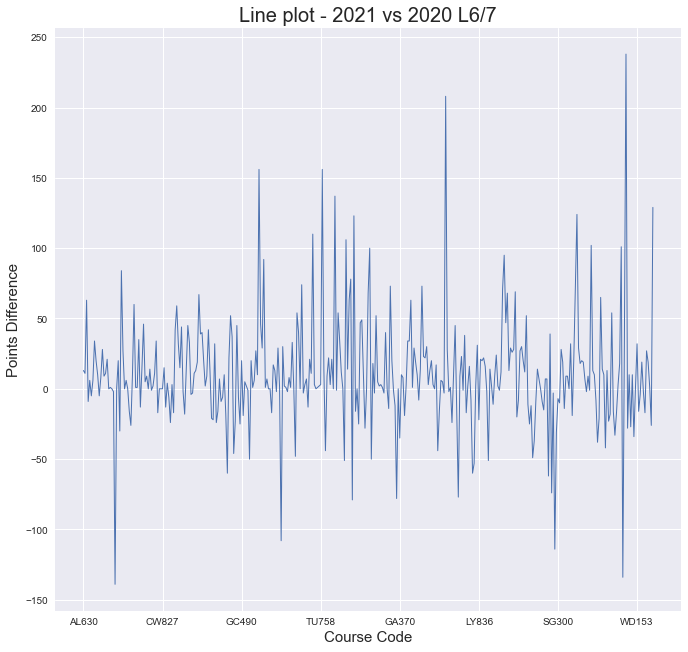

In [199]:
# Setting the size and style of the plot
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (10,10)
# Plotting the dataframe created when the values from 2020 were subtracted from 2021 for levels 6/7
Points_Diff_l7_6.plot(linewidth=1)
# Formatting for improved appearance
plt.title ('Line plot - 2021 vs 2020 L6/7', size=20)
plt.xlabel('Course Code', size=15)
plt.ylabel('Points Difference', size = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

<br>
Again similar to the level 8 plot, large fluctuations from year to year have been observed, many cases over 50 points, but in some extreme cases, up to 200 points. 

In [200]:
# Setting the columns as individual dataframes
R1_Points_2021 = allcourses_l7_6['R1 Points_2021']
R1_Points_2020 = allcourses_l7_6['R1 Points_2020']

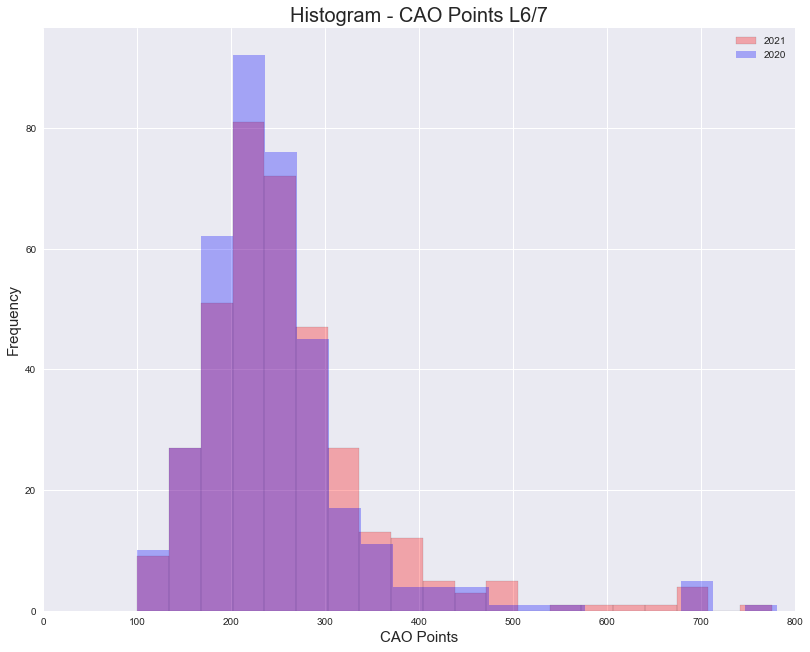

In [201]:
# Plotting
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12,10)
plt.hist(R1_Points_2021, bins=20, alpha=0.3,
         color = 'red', edgecolor = 'black', label = '2021')
plt.hist(R1_Points_2020, bins=20, alpha=0.3,
         color = 'blue', label = '2020')
plt.xlabel('CAO Points', size=15)
plt.ylabel('Frequency', size = 15)
plt.xlim([0, 800])
plt.title ('Histogram - CAO Points L6/7', size=20)
plt.legend()
plt.show()

A quick observation of the histogram above shows that the range with the largest number of courses is 200 - 225 points for both years, with 2020 having the largest number in this range. However, in the range 300 to 420, 2021 has more courses than 2020. This accounts for the increase seen in the previous statistical summary. The kernel density estimate plot is in also similar.

(0.0, 800.0)

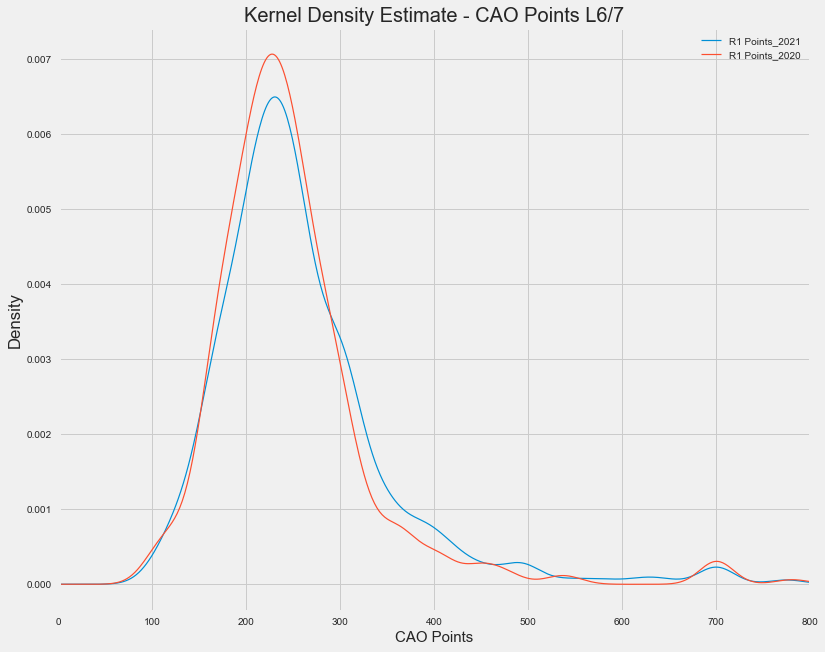

In [202]:
# Plotting kernel density estimate
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (12,10)
allcourses_l7_6.plot.kde(bw_method=0.2
                         , linewidth = 1.2)
plt.xlabel('CAO Points', size=15)
plt.title ('Kernel Density Estimate - CAO Points L6/7', size=20)
plt.xlim([0, 800])

<br>
The kernel density estimate (kde) plot shows that there were more courses with points around the 250 mark for 2020, and only a slight increase at around the 350-400 range for 2021. The difference is not as obvious as it is in the histogram, but it is noticeable.

<br>

## 2020 - 2016 Level 6/7 Points Comparison
***

<br>
The EOS points from the years 2016 to 2020 have previously been loaded into this notebook. I will now combine the points from the years in question to create one dataframe for comparative analysis, as done for level 8 courses.

In [203]:
# Creating new dataframe with  just Course Code and Course from 2020
courses2020_l7_6 = df2020_l7_6[['Course Code', 'Course']]
courses2020_l7_6

,Course Code,Course
12,AL600,Software Design
13,AL601,Computer Engineering
14,AL602,Mechanical Engineering
15,AL604,Civil Engineering
16,AL605,Music and Instrument Technology
...,...,...
1449,WD188,Applied Health Care
1456,WD205,Molecular Biology with Biopharmaceutical Science
1457,WD206,Electronic Engineering
1458,WD207,Mechanical Engineering


In [204]:
# Also create new dataframe with  just Course Code and Course from 2019
# Only Levels 6/7 present in original document
courses2019_l7_6 = df2019_l7_6[['Course Code', 'Course']]
courses2019_l7_6

,Course Code,Course
0,AL600,Software Design
1,AL601,Computer Engineering
2,AL602,Mechanical Engineering
3,AL604,Civil Engineering
4,AL630,Pharmacy Technician
...,...,...
456,WD188,Applied Health Care
457,WD205,Molecular Biology with Biopharmaceutical Science
458,WD206,Electronic Engineering
459,WD207,Mechanical Engineering


In [205]:
# Concatenate the 2020 and 2019 dataframes
# Ignoring the index creates a new index for this dataframe
eos_courses_l7_6 = pd.concat(
    [courses2020_l7_6, courses2019_l7_6], ignore_index=True)
eos_courses_l7_6

,Course Code,Course
0,AL600,Software Design
1,AL601,Computer Engineering
2,AL602,Mechanical Engineering
3,AL604,Civil Engineering
4,AL605,Music and Instrument Technology
...,...,...
893,WD188,Applied Health Care
894,WD205,Molecular Biology with Biopharmaceutical Science
895,WD206,Electronic Engineering
896,WD207,Mechanical Engineering


In [206]:
# Sorting the values by the course code instead
eos_courses_l7_6.sort_values('Course Code')

,Course Code,Course
0,AL600,Software Design
437,AL600,Software Design
438,AL601,Computer Engineering
1,AL601,Computer Engineering
2,AL602,Mechanical Engineering
...,...,...
895,WD206,Electronic Engineering
896,WD207,Mechanical Engineering
435,WD207,Mechanical Engineering
436,WD208,Manufacturing Engineering


In [207]:
# Spot check of duplicated rows, same title verified
eos_courses_l7_6.loc[896]['Course']

'Mechanical Engineering'

In [208]:
eos_courses_l7_6.loc[435]['Course']

'Mechanical Engineering'

In [209]:
# Duplication is expected, i.e. the same course run over different years
# Need to remove duplicates, or deduplicate the dataframe
eos_courses_l7_6[eos_courses_l7_6.duplicated()]

,Course Code,Course
437,AL600,Software Design
438,AL601,Computer Engineering
439,AL602,Mechanical Engineering
440,AL604,Civil Engineering
441,AL630,Pharmacy Technician
...,...,...
893,WD188,Applied Health Care
894,WD205,Molecular Biology with Biopharmaceutical Science
895,WD206,Electronic Engineering
896,WD207,Mechanical Engineering


In [210]:
# drop.duplicates removes the duplicated courses
eos_courses_l7_6.drop_duplicates()

,Course Code,Course
0,AL600,Software Design
1,AL601,Computer Engineering
2,AL602,Mechanical Engineering
3,AL604,Civil Engineering
4,AL605,Music and Instrument Technology
...,...,...
851,TL712,Computing with Digital Media
854,TL719,Culinary Arts
856,TL742,Construction Management
859,TL746,Engineering in Mechatronics Engineering


In [211]:
eos_courses_l7_6 = eos_courses_l7_6[
    eos_courses_l7_6.duplicated(subset=['Course Code'])]

In [212]:
eos_courses_l7_6.drop_duplicates(
    subset=['Course Code'], inplace=True, ignore_index=True)
eos_courses_l7_6

<ipython-input-212-ddcfad88484a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eos_courses_l7_6.drop_duplicates(


,Course Code,Course
0,AL600,Software Design
1,AL601,Computer Engineering
2,AL602,Mechanical Engineering
3,AL604,Civil Engineering
4,AL630,Pharmacy Technician
...,...,...
333,WD188,Applied Health Care
334,WD205,Molecular Biology with Biopharmaceutical Science
335,WD206,Electronic Engineering
336,WD207,Mechanical Engineering


In [213]:
# The course code is now required to be the index of the dataframe
# Performed on original 2020 frame first for confirmation
df2020_l7_6.set_index('Course Code', inplace=True)
df2020_l7_6

,Course,R1 Points_2020,EOS_2020,Mid_2020,Level
Course Code,,,,,
AL600,Software Design,AQA,104,279,6
AL601,Computer Engineering,AQA,112,192,6
AL602,Mechanical Engineering,AQA,260,424,6
AL604,Civil Engineering,AQA,AQA,244,6
AL605,Music and Instrument Technology,AQA,154,306,6
...,...,...,...,...,...
WD188,Applied Health Care,201,201,349,7
WD205,Molecular Biology with Biopharmaceutical Science,228,228,446,7
WD206,Electronic Engineering,179,179,373,7


In [214]:
# Set course code as index
eos_courses_l7_6.set_index('Course Code', inplace=True)
eos_courses_l7_6

,Course
Course Code,
AL600,Software Design
AL601,Computer Engineering
AL602,Mechanical Engineering
AL604,Civil Engineering
AL630,Pharmacy Technician
...,...
WD188,Applied Health Care
WD205,Molecular Biology with Biopharmaceutical Science
WD206,Electronic Engineering


In [215]:
# Join the points from 2020
eos_courses_l7_6 = eos_courses_l7_6.join(
    df2020_l7_6[['EOS_2020']])
eos_courses_l7_6

,Course,EOS_2020
Course Code,,
AL600,Software Design,104
AL601,Computer Engineering,112
AL602,Mechanical Engineering,260
AL604,Civil Engineering,AQA
AL630,Pharmacy Technician,295
...,...,...
WD188,Applied Health Care,201
WD205,Molecular Biology with Biopharmaceutical Science,228
WD206,Electronic Engineering,179


In [216]:
# Load 2019 points and course codes only
df2019_l7_6 = df2019_l7_6[['Course Code', 'EOS_2019_6_7']]
df2019_l7_6

,Course Code,EOS_2019_6_7
0,AL600,205.0
1,AL601,196.0
2,AL602,258.0
3,AL604,252.0
4,AL630,306.0
...,...,...
456,WD188,206.0
457,WD205,208.0
458,WD206,191.0
459,WD207,179.0


In [217]:
# Setting the index as the course code as done previously
df2019_l7_6.set_index('Course Code', inplace=True)
df2019_l7_6

,EOS_2019_6_7
Course Code,
AL600,205.0
AL601,196.0
AL602,258.0
AL604,252.0
AL630,306.0
...,...
WD188,206.0
WD205,208.0
WD206,191.0


In [218]:
# Joining the 2019 EOS points to the 2020 EOS points
eos_courses_l7_6 = eos_courses_l7_6.join(df2019_l7_6)
eos_courses_l7_6

,Course,EOS_2020,EOS_2019_6_7
Course Code,,,
AL600,Software Design,104,205.0
AL601,Computer Engineering,112,196.0
AL602,Mechanical Engineering,260,258.0
AL604,Civil Engineering,AQA,252.0
AL630,Pharmacy Technician,295,306.0
...,...,...,...
WD188,Applied Health Care,201,206.0
WD205,Molecular Biology with Biopharmaceutical Science,228,208.0
WD206,Electronic Engineering,179,191.0


In [219]:
# Creating 2018 dataframe for joining
df2018_l7_6 = df2018_l7_6[['Course Code', 'EOS_2018_7_6']]
df2018_l7_6

,Course Code,EOS_2018_7_6
0,AL601,240.0
1,AL602,201.0
2,AL604,243.0
3,AL630,306.0
4,AL631,307.0
...,...,...
466,WD205,217.0
467,WD206,175.0
468,WD207,182.0
469,WD208,180.0


In [220]:
# Setting the index as the course code as done previously
df2018_l7_6.set_index('Course Code', inplace=True)
df2018_l7_6

,EOS_2018_7_6
Course Code,
AL601,240.0
AL602,201.0
AL604,243.0
AL630,306.0
AL631,307.0
...,...
WD205,217.0
WD206,175.0
WD207,182.0


In [221]:
# Joining the 2018 EOS points to the 2020/2019 EOS points
eos_courses_l7_6 = eos_courses_l7_6.join(df2018_l7_6)
eos_courses_l7_6

,Course,EOS_2020,EOS_2019_6_7,EOS_2018_7_6
Course Code,,,,
AL600,Software Design,104,205.0,NaN
AL601,Computer Engineering,112,196.0,240.0
AL602,Mechanical Engineering,260,258.0,201.0
AL604,Civil Engineering,AQA,252.0,243.0
AL630,Pharmacy Technician,295,306.0,306.0
...,...,...,...,...
WD188,Applied Health Care,201,206.0,242.0
WD205,Molecular Biology with Biopharmaceutical Science,228,208.0,217.0
WD206,Electronic Engineering,179,191.0,175.0


In [222]:
# Creating 2017 dataframe for joining
df2017_l7_6 = df2017_l7_6[['Course Code', 'EOS_2017_7_6']]
df2017_l7_6

,Course Code,EOS_2017_7_6
0,AL601,228.0
1,AL602,212.0
2,AL604,NaN
3,AL630,290.0
4,AL631,273.0
...,...,...
452,WD176,242.0
453,WD177,357.0
454,WD182,196.0
455,WD184,190.0


In [223]:
# Setting the index as the course code 
df2017_l7_6.set_index('Course Code', inplace=True)
df2017_l7_6

,EOS_2017_7_6
Course Code,
AL601,228.0
AL602,212.0
AL604,NaN
AL630,290.0
AL631,273.0
...,...
WD176,242.0
WD177,357.0
WD182,196.0


In [224]:
# Joining the 2017 EOS points
eos_courses_l7_6 = eos_courses_l7_6.join(df2017_l7_6)
eos_courses_l7_6

,Course,EOS_2020,EOS_2019_6_7,EOS_2018_7_6,EOS_2017_7_6
Course Code,,,,,
AL600,Software Design,104,205.0,NaN,NaN
AL601,Computer Engineering,112,196.0,240.0,228.0
AL602,Mechanical Engineering,260,258.0,201.0,212.0
AL604,Civil Engineering,AQA,252.0,243.0,NaN
AL630,Pharmacy Technician,295,306.0,306.0,290.0
...,...,...,...,...,...
WD188,Applied Health Care,201,206.0,242.0,249.0
WD205,Molecular Biology with Biopharmaceutical Science,228,208.0,217.0,NaN
WD206,Electronic Engineering,179,191.0,175.0,NaN


In [225]:
# Creating 2016 dataframe for joining
df2016_l7_6 = df2016_l7_6[['Course Code', 'EOS_2016_7_6']]
df2016_l7_6

,Course Code,EOS_2016_7_6
0,AL601,205.0
1,AL602,205.0
2,AL604,280.0
3,AL630,270.0
4,AL631,275.0
...,...,...
458,WD176,300.0
459,WD177,315.0
460,WD182,205.0
461,WD184,200.0


In [226]:
# Setting the index as the course code 
df2016_l7_6.set_index('Course Code', inplace=True)
df2016_l7_6

,EOS_2016_7_6
Course Code,
AL601,205.0
AL602,205.0
AL604,280.0
AL630,270.0
AL631,275.0
...,...
WD176,300.0
WD177,315.0
WD182,205.0


In [227]:
# Joining the 2016 EOS points
eos_courses_l7_6 = eos_courses_l7_6.join(df2016_l7_6)
eos_courses_l7_6

,Course,EOS_2020,EOS_2019_6_7,EOS_2018_7_6,EOS_2017_7_6,EOS_2016_7_6
Course Code,,,,,,
AL600,Software Design,104,205.0,NaN,NaN,NaN
AL601,Computer Engineering,112,196.0,240.0,228.0,205.0
AL602,Mechanical Engineering,260,258.0,201.0,212.0,205.0
AL604,Civil Engineering,AQA,252.0,243.0,NaN,280.0
AL630,Pharmacy Technician,295,306.0,306.0,290.0,270.0
...,...,...,...,...,...,...
WD188,Applied Health Care,201,206.0,242.0,249.0,310.0
WD205,Molecular Biology with Biopharmaceutical Science,228,208.0,217.0,NaN,NaN
WD206,Electronic Engineering,179,191.0,175.0,NaN,NaN


In [228]:
# Re-labelling columns for consistency
eos_courses_l7_6.rename(
columns={'EOS_2020' : 'EOS_2020_7_6', 'EOS_2019_6_7' : 'EOS_2019_7_6'}
    , inplace = True)
eos_courses_l7_6

,Course,EOS_2020_7_6,EOS_2019_7_6,EOS_2018_7_6,EOS_2017_7_6,EOS_2016_7_6
Course Code,,,,,,
AL600,Software Design,104,205.0,NaN,NaN,NaN
AL601,Computer Engineering,112,196.0,240.0,228.0,205.0
AL602,Mechanical Engineering,260,258.0,201.0,212.0,205.0
AL604,Civil Engineering,AQA,252.0,243.0,NaN,280.0
AL630,Pharmacy Technician,295,306.0,306.0,290.0,270.0
...,...,...,...,...,...,...
WD188,Applied Health Care,201,206.0,242.0,249.0,310.0
WD205,Molecular Biology with Biopharmaceutical Science,228,208.0,217.0,NaN,NaN
WD206,Electronic Engineering,179,191.0,175.0,NaN,NaN


In [229]:
# Preferred option is to compare 2020 to 2019 first
eos_1920_l7_6 = eos_courses_l7_6[
    ['Course', 'EOS_2020_7_6', 'EOS_2019_7_6']]
eos_1920_l7_6

,Course,EOS_2020_7_6,EOS_2019_7_6
Course Code,,,
AL600,Software Design,104,205.0
AL601,Computer Engineering,112,196.0
AL602,Mechanical Engineering,260,258.0
AL604,Civil Engineering,AQA,252.0
AL630,Pharmacy Technician,295,306.0
...,...,...,...
WD188,Applied Health Care,201,206.0
WD205,Molecular Biology with Biopharmaceutical Science,228,208.0
WD206,Electronic Engineering,179,191.0


In [230]:
# Dropping courses with NaN values (18 in total)
# Can't do numerical assessment on NaN values
eos_1920_l7_6.dropna(inplace=True)
eos_1920_l7_6

<ipython-input-230-a4d7d735b192>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eos_1920_l7_6.dropna(inplace=True)


,Course,EOS_2020_7_6,EOS_2019_7_6
Course Code,,,
AL600,Software Design,104,205.0
AL601,Computer Engineering,112,196.0
AL602,Mechanical Engineering,260,258.0
AL604,Civil Engineering,AQA,252.0
AL630,Pharmacy Technician,295,306.0
...,...,...,...
WD188,Applied Health Care,201,206.0
WD205,Molecular Biology with Biopharmaceutical Science,228,208.0
WD206,Electronic Engineering,179,191.0


In [231]:
# Removing all courses with All Qualified Applicants (AQA) (14 in total)
# Also cannot perform numerical analysis on AQA
eos_1920_l7_6 = eos_1920_l7_6[
    ~eos_1920_l7_6['EOS_2020_7_6'].isin(['AQA'])]
eos_1920_l7_6 = eos_1920_l7_6[
    ~eos_1920_l7_6['EOS_2019_7_6'].isin(['AQA'])]
eos_1920_l7_6

,Course,EOS_2020_7_6,EOS_2019_7_6
Course Code,,,
AL600,Software Design,104,205.0
AL601,Computer Engineering,112,196.0
AL602,Mechanical Engineering,260,258.0
AL630,Pharmacy Technician,295,306.0
AL631,Dental Nursing,298,326.0
...,...,...,...
WD188,Applied Health Care,201,206.0
WD205,Molecular Biology with Biopharmaceutical Science,228,208.0
WD206,Electronic Engineering,179,191.0


In [232]:
# Values at position 111 and 112 have # before points value, need to remove
eos_1920_l7_6.iloc[111]

Course          Dental Hygiene
EOS_2020_7_6              #498
EOS_2019_7_6             520.0
Name: TR802, dtype: object

In [233]:
# Replacing #543 with 543
eos_1920_l7_6['EOS_2020_7_6'] = eos_1920_l7_6[
    'EOS_2020_7_6'].replace(['#498'],'498')

In [234]:
eos_1920_l7_6.iloc[112]

Course          Dental Technology
EOS_2020_7_6                 #359
EOS_2019_7_6                367.0
Name: TR803, dtype: object

In [235]:
# Replacing #359 with 359
eos_1920_l7_6['EOS_2020_7_6'] = eos_1920_l7_6[
    'EOS_2020_7_6'].replace(['#359'],'359')

In [236]:
# Checking datatypes of dataframe
eos_1920_l7_6.dtypes

Course           object
EOS_2020_7_6     object
EOS_2019_7_6    float64
dtype: object

In [237]:
# Need to convert to numerical format for plotting
eos_1920_l7_6[
    "EOS_2020_7_6"] = pd.to_numeric(eos_1920_l7_6["EOS_2020_7_6"])
eos_1920_l7_6.dtypes

Course           object
EOS_2020_7_6      int64
EOS_2019_7_6    float64
dtype: object

In [238]:
# Getting basic statistical analysis of the two columns
eos_1920_l7_6[["EOS_2020_7_6", "EOS_2019_7_6"]].describe()

,EOS_2020_7_6,EOS_2019_7_6
count,306.000000,306.000000
mean,242.297386,230.222222
std,90.506769,84.180892
min,80.000000,101.000000
25%,192.250000,182.250000
50%,232.000000,216.000000
75%,271.500000,258.750000
max,781.000000,700.000000


<br>

An increase was also seen from 2019 to 2020. The mean increased from 230 to 242, the interquartile ranges also increased and the variation (observed from the standard deviation) also increased. Visual plots below

In [239]:
# Setting the columns as individual dataframes
EOS_2020_7_6 = eos_1920_l7_6['EOS_2020_7_6']
EOS_2019_7_6 = eos_1920_l7_6['EOS_2019_7_6']

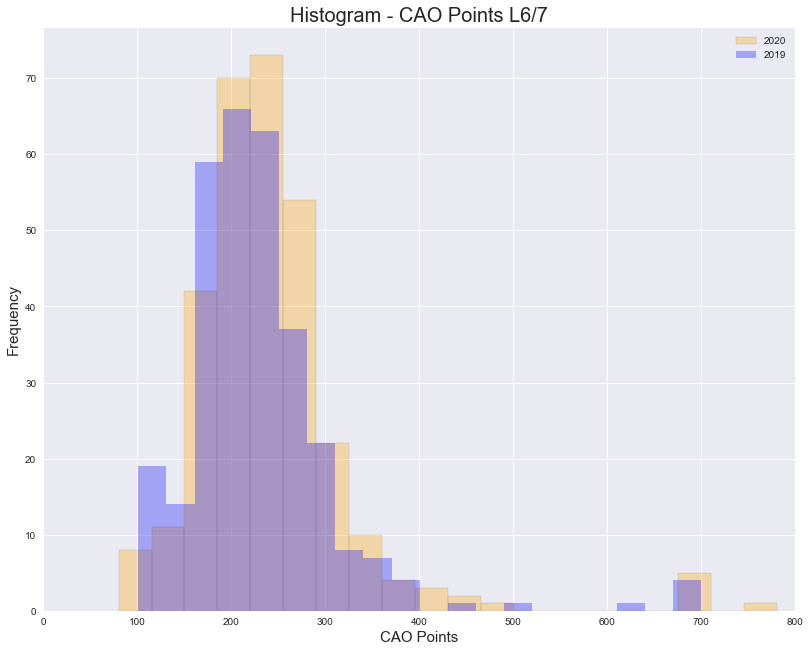

In [240]:
# Plotting
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12,10)
plt.hist(EOS_2020_7_6, bins=20, alpha=0.3,
         color = 'orange', edgecolor = 'black', label = '2020')
plt.hist(EOS_2019_7_6, bins=20, alpha=0.3,
         color = 'blue', label = '2019')
plt.xlabel('CAO Points', size=15)
plt.ylabel('Frequency', size = 15)
plt.xlim([0, 800])
plt.title ('Histogram - CAO Points L6/7', size=20)
plt.legend()
plt.show()

(0.0, 800.0)

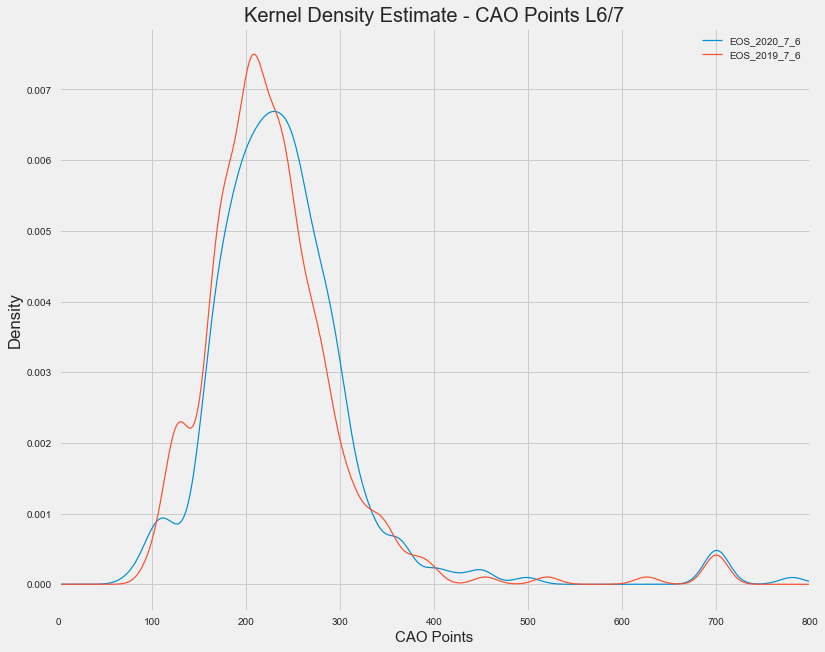

In [241]:
 # Plotting kernel density estimate
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (12,10)
eos_1920_l7_6.plot.kde(bw_method=0.15, linewidth = 1.2)
plt.xlabel('CAO Points', size=15)
plt.title ('Kernel Density Estimate - CAO Points L6/7', size=20)
plt.xlim([0, 800])

Similar to the 2021 / 2020 plots, there is a larger amount of courses at the 200 to 250 range in the previous year. A slight observable increase at the 300 point mark is evident.  
This indicates that the increase from 2020 to 2021 was greater than the increase from 2019 to 2020.  
To record the trend from the previous few years the points from 2016 to 2020 will be compared.

In [242]:
# Calling previous dataframe with 5 years' points
eos_courses_l7_6

,Course,EOS_2020_7_6,EOS_2019_7_6,EOS_2018_7_6,EOS_2017_7_6,EOS_2016_7_6
Course Code,,,,,,
AL600,Software Design,104,205.0,NaN,NaN,NaN
AL601,Computer Engineering,112,196.0,240.0,228.0,205.0
AL602,Mechanical Engineering,260,258.0,201.0,212.0,205.0
AL604,Civil Engineering,AQA,252.0,243.0,NaN,280.0
AL630,Pharmacy Technician,295,306.0,306.0,290.0,270.0
...,...,...,...,...,...,...
WD188,Applied Health Care,201,206.0,242.0,249.0,310.0
WD205,Molecular Biology with Biopharmaceutical Science,228,208.0,217.0,NaN,NaN
WD206,Electronic Engineering,179,191.0,175.0,NaN,NaN


In [243]:
# Dropping courses with NaN values (89 in total)
# Can't do numerical assessment on NaN values
eos_courses_l7_6.dropna(inplace=True)
eos_courses_l7_6

,Course,EOS_2020_7_6,EOS_2019_7_6,EOS_2018_7_6,EOS_2017_7_6,EOS_2016_7_6
Course Code,,,,,,
AL601,Computer Engineering,112,196.0,240.0,228.0,205.0
AL602,Mechanical Engineering,260,258.0,201.0,212.0,205.0
AL630,Pharmacy Technician,295,306.0,306.0,290.0,270.0
AL631,Dental Nursing,298,326.0,307.0,273.0,275.0
AL632,Applied Science,234,243.0,216.0,190.0,210.0
...,...,...,...,...,...,...
WD175,Pharmaceutical Science,226,207.0,206.0,225.0,283.0
WD177,Science (Mol. Biology with Biopharm.Food Scien...,222,213.0,283.0,357.0,315.0
WD182,Electrical Engineering,AQA,188.0,189.0,196.0,205.0


In [244]:
# Removing all courses with All Qualified Applicants (AQA) (8 in total)
# Also cannot perform numerical analysis on AQA
eos_courses_l7_6 = eos_courses_l7_6[
    ~eos_courses_l7_6['EOS_2020_7_6'].isin(['AQA'])]
eos_courses_l7_6 = eos_courses_l7_6[
    ~eos_courses_l7_6['EOS_2019_7_6'].isin(['AQA'])]
eos_courses_l7_6 = eos_courses_l7_6[
    ~eos_courses_l7_6['EOS_2018_7_6'].isin(['AQA'])]
eos_courses_l7_6 = eos_courses_l7_6[
    ~eos_courses_l7_6['EOS_2017_7_6'].isin(['AQA'])]
eos_courses_l7_6 = eos_courses_l7_6[
    ~eos_courses_l7_6['EOS_2016_7_6'].isin(['AQA'])]
eos_courses_l7_6

,Course,EOS_2020_7_6,EOS_2019_7_6,EOS_2018_7_6,EOS_2017_7_6,EOS_2016_7_6
Course Code,,,,,,
AL601,Computer Engineering,112,196.0,240.0,228.0,205.0
AL602,Mechanical Engineering,260,258.0,201.0,212.0,205.0
AL630,Pharmacy Technician,295,306.0,306.0,290.0,270.0
AL631,Dental Nursing,298,326.0,307.0,273.0,275.0
AL632,Applied Science,234,243.0,216.0,190.0,210.0
...,...,...,...,...,...,...
WD164,Food Science with Business,309,222.0,216.0,233.0,255.0
WD175,Pharmaceutical Science,226,207.0,206.0,225.0,283.0
WD177,Science (Mol. Biology with Biopharm.Food Scien...,222,213.0,283.0,357.0,315.0


In [245]:
# Checking datatypes of dataframe
eos_courses_l7_6.dtypes

Course           object
EOS_2020_7_6     object
EOS_2019_7_6    float64
EOS_2018_7_6    float64
EOS_2017_7_6    float64
EOS_2016_7_6    float64
dtype: object

In [246]:
# Values at position 93 and 94 have # before points value, need to remove
eos_courses_l7_6.iloc[93]

Course          Dental Hygiene
EOS_2020_7_6              #498
EOS_2019_7_6             520.0
EOS_2018_7_6             424.0
EOS_2017_7_6             398.0
EOS_2016_7_6             420.0
Name: TR802, dtype: object

In [247]:
# Replacing #498 with 498
eos_courses_l7_6['EOS_2020_7_6'] = eos_courses_l7_6[
    'EOS_2020_7_6'].replace(['#498'],'498')

In [248]:
eos_courses_l7_6.iloc[94]

Course          Dental Technology
EOS_2020_7_6                 #359
EOS_2019_7_6                367.0
EOS_2018_7_6                336.0
EOS_2017_7_6                363.0
EOS_2016_7_6                375.0
Name: TR803, dtype: object

In [249]:
# Replacing #359 with 359
eos_courses_l7_6['EOS_2020_7_6'] = eos_courses_l7_6[
    'EOS_2020_7_6'].replace(['#359'],'359')

In [250]:
# Need to convert to numerical 'int64' for plotting
eos_courses_l7_6[
    "EOS_2020_7_6"] = pd.to_numeric(eos_courses_l7_6["EOS_2020_7_6"])
eos_courses_l7_6.dtypes

Course           object
EOS_2020_7_6      int64
EOS_2019_7_6    float64
EOS_2018_7_6    float64
EOS_2017_7_6    float64
EOS_2016_7_6    float64
dtype: object

In [251]:
# Getting basic statistical analysis of the two columns
eos_courses_l7_6[
    ["EOS_2020_7_6", "EOS_2019_7_6", "EOS_2018_7_6",
    "EOS_2017_7_6", "EOS_2016_7_6"]].describe()

,EOS_2020_7_6,EOS_2019_7_6,EOS_2018_7_6,EOS_2017_7_6,EOS_2016_7_6
count,241.000000,241.000000,241.000000,241.000000,241.000000
mean,249.576763,236.244813,236.481328,240.452282,238.663900
std,94.458695,88.297286,89.556504,88.977893,89.344086
min,100.000000,101.000000,101.000000,100.000000,75.000000
25%,199.000000,188.000000,195.000000,191.000000,195.000000
50%,234.000000,222.000000,215.000000,220.000000,220.000000
75%,277.000000,261.000000,260.000000,270.000000,275.000000
max,781.000000,700.000000,783.000000,750.000000,700.000000


The trend from 2016 up to 2020 for level 6 and 7 courses is in line with the level 8 courses' trend. The points remained at a steady level for the years in question until 2020. 2020 was the first year that predictive grades were used and the results are obvious. Artificial increase of grades has led to an increase in overall points due to the predicitive grade system.  
Visual plots of the years 2016 to 2020 for level 6 and 7 courses below

In [252]:
# Setting the columns as individual dataframes
EOS_2020_7_6 = eos_courses_l7_6['EOS_2020_7_6']
EOS_2019_7_6 = eos_courses_l7_6['EOS_2019_7_6']
EOS_2018_7_6 = eos_courses_l7_6['EOS_2018_7_6']
EOS_2017_7_6 = eos_courses_l7_6['EOS_2017_7_6']
EOS_2016_7_6 = eos_courses_l7_6['EOS_2016_7_6']

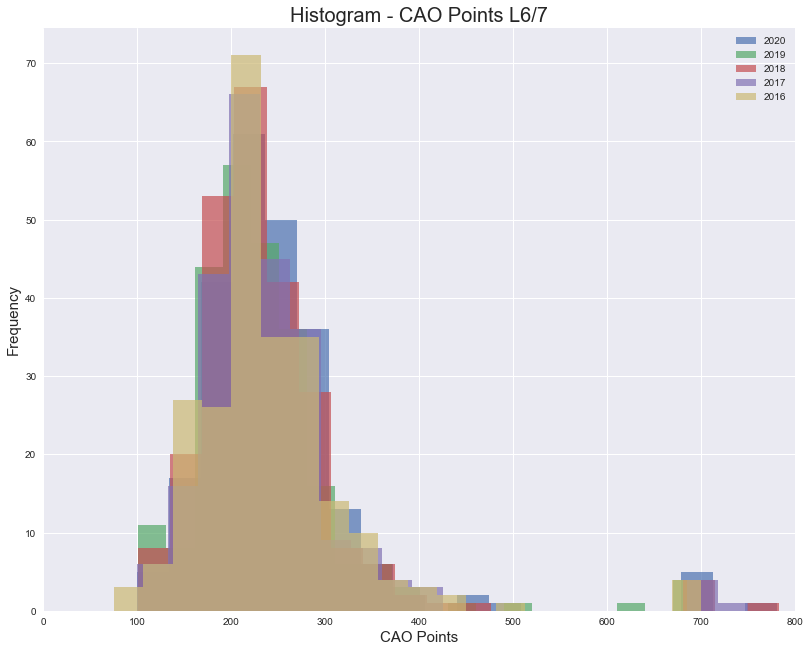

In [253]:
# Plotting
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12,10)
plt.hist(EOS_2020_7_6, bins=20, alpha=0.7, label = '2020')
plt.hist(EOS_2019_7_6, bins=20, alpha=0.7, label = '2019')
plt.hist(EOS_2018_7_6, bins=20, alpha=0.7, label = '2018')
plt.hist(EOS_2017_7_6, bins=20, alpha=0.7, label = '2017')
plt.hist(EOS_2016_7_6, bins=20, alpha=0.7, label = '2016')
plt.xlabel('CAO Points', size=15)
plt.ylabel('Frequency', size = 15)
plt.xlim([0, 800])
plt.title ('Histogram - CAO Points L6/7', size=20)
plt.legend()
plt.show()

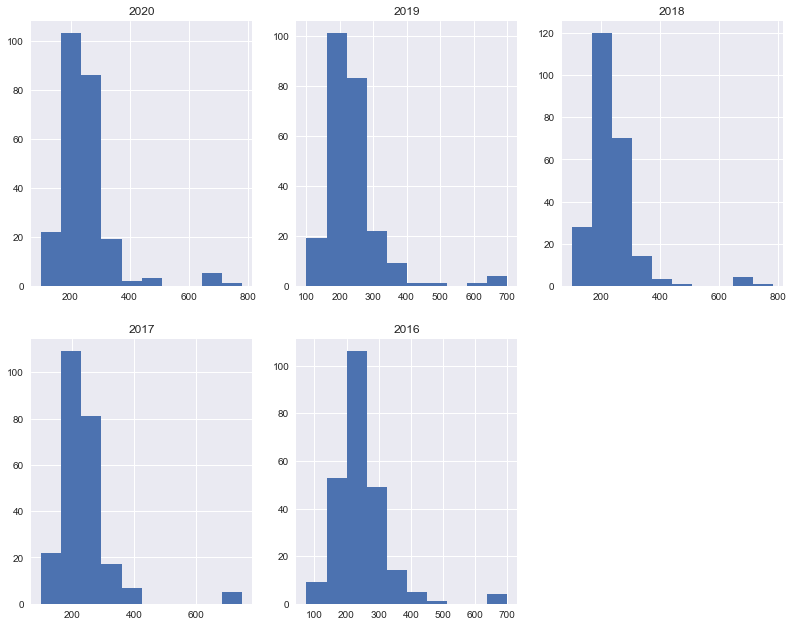

In [254]:
# Subplots for clarity
# Setting 2 rows, 3 columns and indexing the plots 1-5
plt.subplot(2, 3, 1)
plt.title('2020')
plt.hist(EOS_2020_7_6)

plt.subplot(2, 3, 2)
plt.title('2019')
plt.hist(EOS_2019_7_6)

plt.subplot(2, 3, 3)
plt.title('2018')
plt.hist(EOS_2018_7_6)

plt.subplot(2, 3, 4)
plt.title('2017')
plt.hist(EOS_2017_7_6)

plt.subplot(2, 3, 5)
plt.title('2016')
plt.hist(EOS_2016_7_6)

plt.show()

(0.0, 800.0)

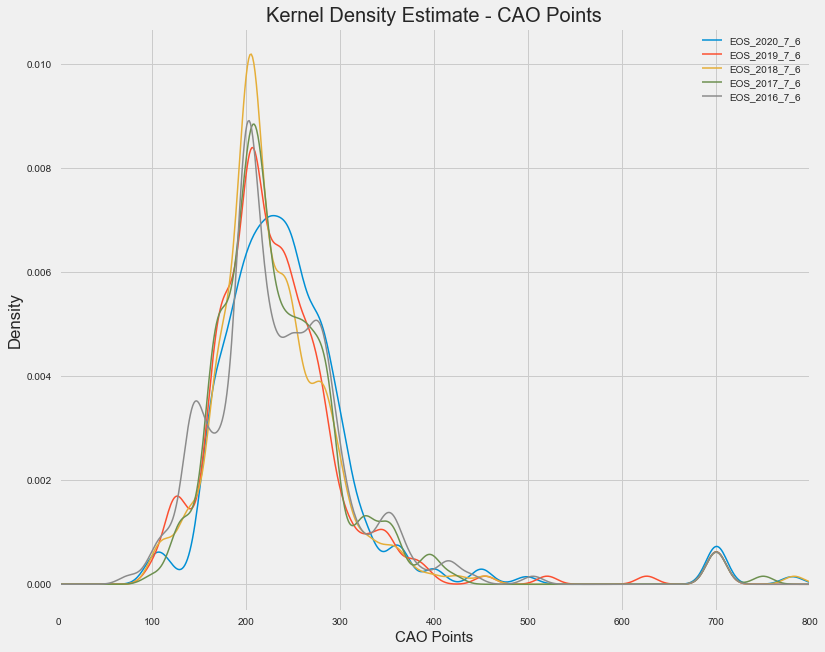

In [255]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (12,10)
eos_courses_l7_6.plot.kde(bw_method=0.12, linewidth = 1.5)
plt.xlabel('CAO Points', size=15)
plt.title ('Kernel Density Estimate - CAO Points', size=20)
plt.xlim([0, 800])

The histogram and kde demonstrate the similarities between the years 2016 to 2019, and the difference in points in the year 2020. A noticeable shift right in both plots is evident, particularly in the kde plot where the previous 4 years are broadly similar and the 2020 plot decreased at the 200 point mark and has a maximum at the 250 point mark.

<br>

## Conclusion
***

<br>  

![](http://c1.thejournal.ie/media/2011/08/leaving-cert-72711-752x501.jpg)

The above notebook gives a detailed investigation of the CAO points for the past five years. The overriding trend of the data is that not much of an increase was seeen from year to year until the year 2020. in 2020 the predictive grades model was introduced as a result of the COVID-19 pandemic as students missed out on so much face to face teaching time during lockdowns. A further increase in 2021 is confirmation of the affect of the predicitive grades model. 
While the predicitive grades model was seen as the fairest option at the time it is clear that there is an increase in points arising from the introduction of this system, with an increase observed each year it has been utilized. Should the points keep icreasing as long as this system is in place then the benefit of this system will be offset by the points increase. i.e. if the points keep increasing for courses then more pressure will be put on students to achieve points for courses.  
The predcitive grades model was introduced to alleviate presurre on students during the COVID-19 lockdown this has proven to be counter-productive. Increasing the points for more courses makes it difficult for students to get places on theit desired courses.  
The CAO points system is a fair and equitable system, and from the points analysis it has been shown that there was no general increase seen in the system year on year until the COVID-19 pandemic. The pandemic forced the introduction of the predicitive grades model which, based on the analysis in the notebook above, has generally increased points acrossed the board. This, in turn, puts more pressure on students to achieve better grades, and subsequently more CAO points.

## References
***
<br>

[1] https://en.wikipedia.org/wiki/Central_Applications_Office  
[2] https://appdividend.com/2020/04/28/python-how-to-select-rows-from-pandas-dataframe/  
[3] https://www.listendata.com/2019/06/pandas-read-csv.html  
[4] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html  
[5] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html  
[6] https://www.irishexaminer.com/lifestyle/healthandwellbeing/arid-40697222.html    
[7] https://www.irishtimes.com/news/education/leaving-cert-2020-calculated-grades-what-lessons-should-be-learned-1.4491196  
[8]  https://www.theguardian.com/education/2021/aug/10/private-schools-in-england-give-pupils-top-grades-in-70-of-a-level-entries   

<br>

## End
***
***